all about regularization
https://youtu.be/OH4_Xsk8nfc?si=NlGeqqYK1Gm1xzeC

https://youtu.be/VqKq78PVO9g?si=wkpIr09MmkMtDGa7

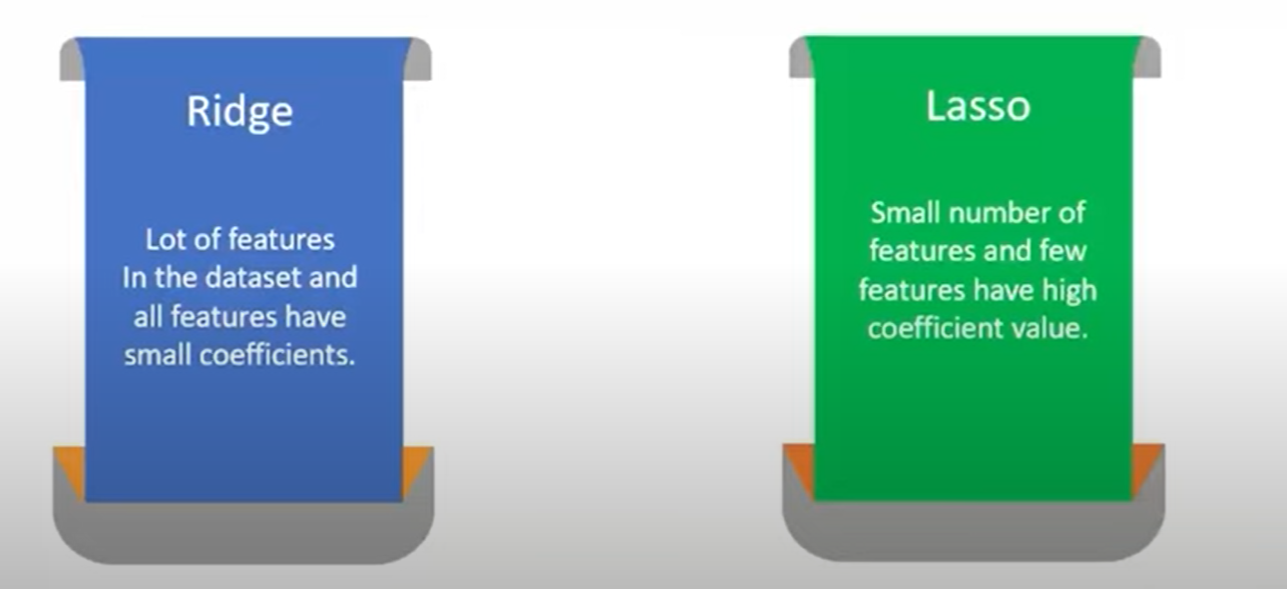

###### Ridge Regression
    
   "Ridge regression is the regularized form of linear regression."
   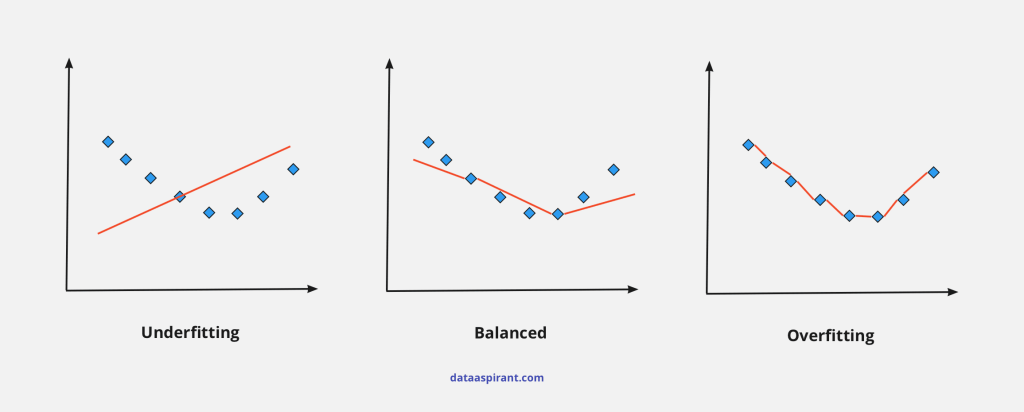
    
    -Ridge regression is a method of estimating the coefficients of multiple-regression models in scenarios where the independent variables are highly correlated.
    -Ridge Regression is a type of regularized linear regression that helps to prevent overfitting. 
    -It is similar to ordinary least squares regression, but with an additional penalty term added to the cost function. 
    -The penalty term is a regularization parameter, denoted by ‘alpha’, that controls the degree of shrinkage of the regression coefficients towards zero. 
    -The higher the value of alpha, the greater the degree of shrinkage and the more strong the model becomes.
    -Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values being far away from the actual values. 
    -It shrinks the parameters. Therefore, it is used to prevent multicollinearity
    -It reduces the model complexity by coefficient shrinkage
    -In an extension to the linear regression that encourages the models which use small coefficient values, penalties added to the loss function during the training period. 

    -These extensions were termed as the penalized linear regression or regularized linear regression.

    -So, ridge regression is a famous regularized linear regression which makes use of the L2 penalty. This penalty shrinks the coefficients of those input variables which have not contributed less in the prediction task.
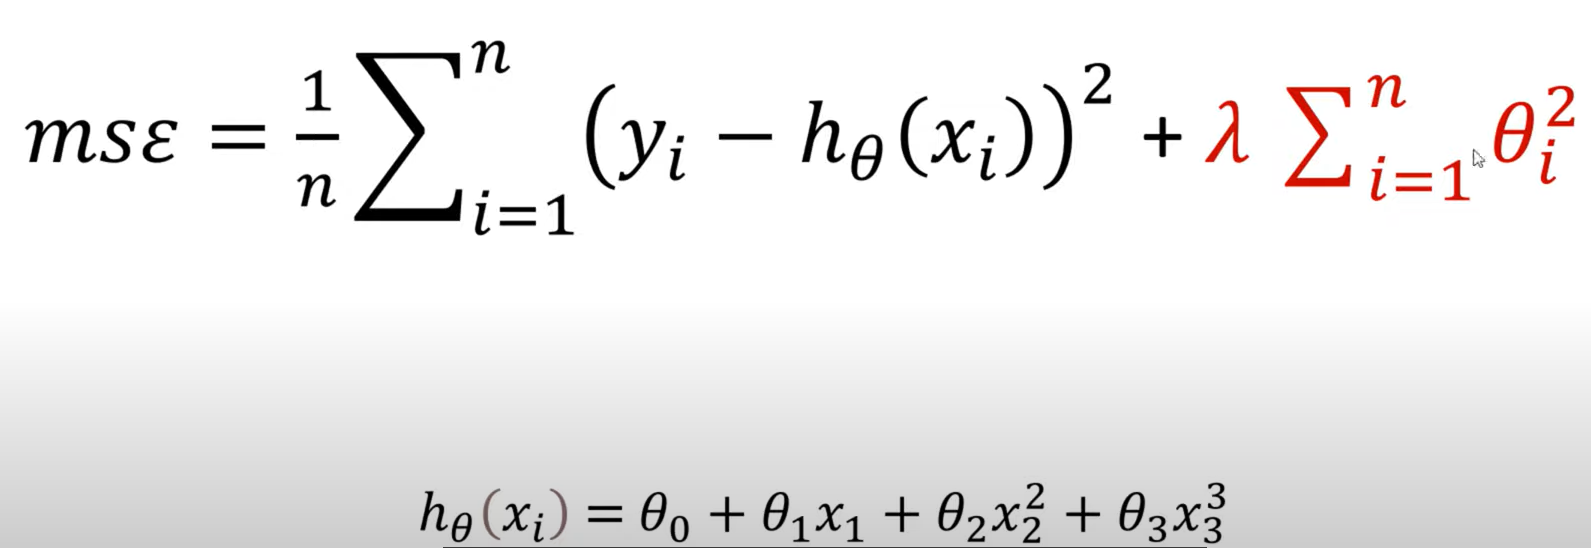
     -Lambda is the penalty term. λ given here is denoted by an alpha parameter in the ridge function. So, by changing the values of alpha, we are controlling the penalty term. The higher the values of alpha, the bigger is the penalty and therefore the magnitude of coefficients is reduced.

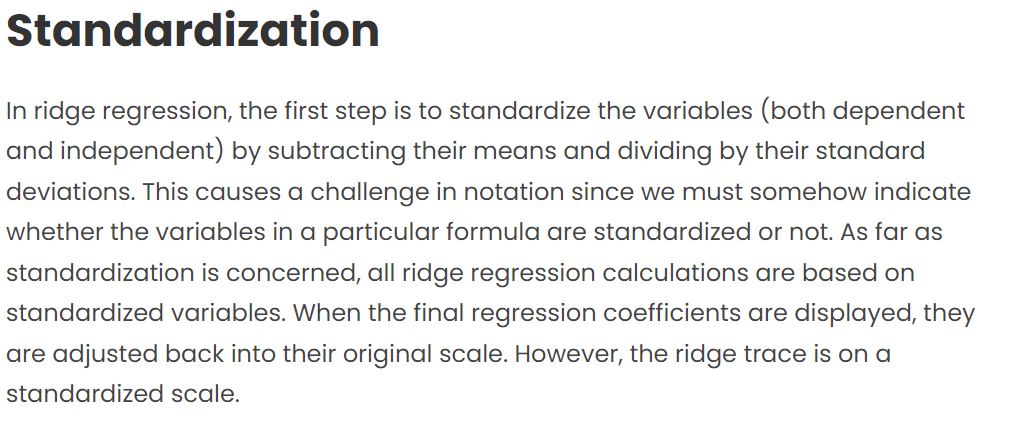

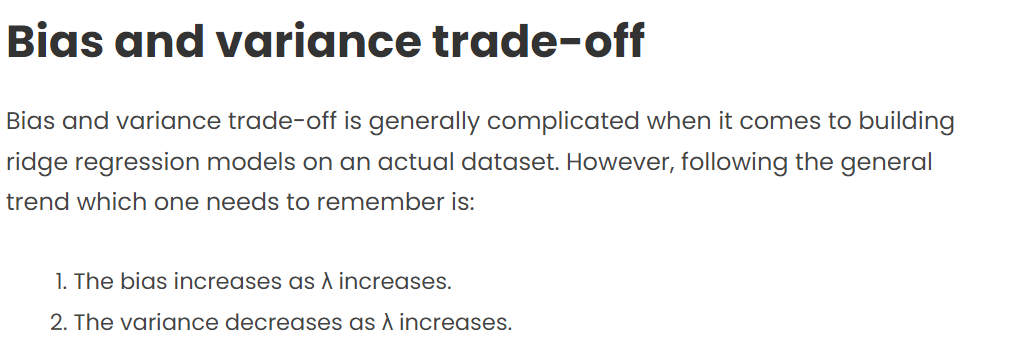

for complete ridge regression-
    https://sparkbyexamples.com/machine-learning/ridge-regression-with-examples/
    
https://www.mygreatlearning.com/blog/what-is-ridge-regression/

Ridge Regression Sklearn Python Implementation---https://dataaspirant.com/ridge-regression/#t-1676385870391

In [266]:
# # https://youtu.be/OH4_Xsk8nfc?si=s9VkHeTN3y97aLW7
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [267]:
df=pd.read_csv("auto-mpg.csv")
df

mpg  cylinders  displacement horsepower  weight  acceleration  \
0    18.0          8         307.0        130    3504          12.0   
1    15.0          8         350.0        165    3693          11.5   
2    18.0          8         318.0        150    3436          11.0   
3    16.0          8         304.0        150    3433          12.0   
4    17.0          8         302.0        140    3449          10.5   
..    ...        ...           ...        ...     ...           ...   
393  27.0          4         140.0         86    2790          15.6   
394  44.0          4          97.0         52    2130          24.6   
395  32.0          4         135.0         84    2295          11.6   
396  28.0          4         120.0         79    2625          18.6   
397  31.0          4         119.0         82    2720          19.4   

     model year  origin                   car name  
0            70       1  chevrolet chevelle malibu  
1            70       1          buick skylark 320  
2            70       1         plymouth satellite  
3            70       1              amc rebel sst  
4            70       1                ford torino  
..          ...     ...                        ...  
393          82       1            ford mustang gl  
394          82       2                  vw pickup  
395          82       1              dodge rampage  
396          82       1                ford ranger  
397          82       1                 chevy s-10  

[398 rows x 9 columns]

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [269]:
df.describe()

mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000      8.000000   
25%     17.500000    4.000000    104.250000  2223.750000     13.825000   
50%     23.000000    4.000000    148.500000  2803.500000     15.500000   
75%     29.000000    8.000000    262.000000  3608.000000     17.175000   
max     46.600000    8.000000    455.000000  5140.000000     24.800000   

       model year      origin  
count  398.000000  398.000000  
mean    76.010050    1.572864  
std      3.697627    0.802055  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000

In [270]:
df.shape


(398, 9)

In [271]:
df.head(3)

mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite

In [272]:
df.drop("car name",axis=1,inplace=True)
df

mpg  cylinders  displacement horsepower  weight  acceleration  \
0    18.0          8         307.0        130    3504          12.0   
1    15.0          8         350.0        165    3693          11.5   
2    18.0          8         318.0        150    3436          11.0   
3    16.0          8         304.0        150    3433          12.0   
4    17.0          8         302.0        140    3449          10.5   
..    ...        ...           ...        ...     ...           ...   
393  27.0          4         140.0         86    2790          15.6   
394  44.0          4          97.0         52    2130          24.6   
395  32.0          4         135.0         84    2295          11.6   
396  28.0          4         120.0         79    2625          18.6   
397  31.0          4         119.0         82    2720          19.4   

     model year  origin  
0            70       1  
1            70       1  
2            70       1  
3            70       1  
4            70       1  
..          ...     ...  
393          82       1  
394          82       2  
395          82       1  
396          82       1  
397          82       1  

[398 rows x 8 columns]

In [273]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [274]:
df[df.horsepower.str.isdigit()==False]

mpg  cylinders  displacement horsepower  weight  acceleration  \
32   25.0          4          98.0          ?    2046          19.0   
126  21.0          6         200.0          ?    2875          17.0   
330  40.9          4          85.0          ?    1835          17.3   
336  23.6          4         140.0          ?    2905          14.3   
354  34.5          4         100.0          ?    2320          15.8   
374  23.0          4         151.0          ?    3035          20.5   

     model year  origin  
32           71       1  
126          74       1  
330          80       2  
336          80       1  
354          81       2  
374          82       1

In [275]:
df[df["horsepower"].str.isdigit()==False]

mpg  cylinders  displacement horsepower  weight  acceleration  \
32   25.0          4          98.0          ?    2046          19.0   
126  21.0          6         200.0          ?    2875          17.0   
330  40.9          4          85.0          ?    1835          17.3   
336  23.6          4         140.0          ?    2905          14.3   
354  34.5          4         100.0          ?    2320          15.8   
374  23.0          4         151.0          ?    3035          20.5   

     model year  origin  
32           71       1  
126          74       1  
330          80       2  
336          80       1  
354          81       2  
374          82       1

In [276]:
df["horsepower"]=df["horsepower"].replace("?",np.nan)

In [277]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [278]:
df["horsepower"]=df["horsepower"].fillna(df["horsepower"].median())


In [279]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [280]:
df.head(3)

mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   

   origin  
0       1  
1       1  
2       1

In [281]:
x=df.iloc[:,1:]
y=df.drop(x,axis=1)

In [282]:
x

cylinders  displacement horsepower  weight  acceleration  model year  \
0            8         307.0        130    3504          12.0          70   
1            8         350.0        165    3693          11.5          70   
2            8         318.0        150    3436          11.0          70   
3            8         304.0        150    3433          12.0          70   
4            8         302.0        140    3449          10.5          70   
..         ...           ...        ...     ...           ...         ...   
393          4         140.0         86    2790          15.6          82   
394          4          97.0         52    2130          24.6          82   
395          4         135.0         84    2295          11.6          82   
396          4         120.0         79    2625          18.6          82   
397          4         119.0         82    2720          19.4          82   

     origin  
0         1  
1         1  
2         1  
3         1  
4         1  
..      ...  
393       1  
394       2  
395       1  
396       1  
397       1  

[398 rows x 7 columns]

In [283]:
x.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model year', 'origin'],
      dtype='object')

In [284]:
y

mpg
0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
..    ...
393  27.0
394  44.0
395  32.0
396  28.0
397  31.0

[398 rows x 1 columns]

In [285]:
from sklearn import preprocessing
x_scaled=preprocessing.scale(x)
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)
y_scaled=preprocessing.scale(y)
y_scaled=pd.DataFrame(y_scaled,columns=y.columns)

In [286]:
x_scaled

cylinders  displacement  horsepower    weight  acceleration  model year  \
0     1.498191      1.090604    0.673118  0.630870     -1.295498   -1.627426   
1     1.498191      1.503514    1.589958  0.854333     -1.477038   -1.627426   
2     1.498191      1.196232    1.197027  0.550470     -1.658577   -1.627426   
3     1.498191      1.061796    1.197027  0.546923     -1.295498   -1.627426   
4     1.498191      1.042591    0.935072  0.565841     -1.840117   -1.627426   
..         ...           ...         ...       ...           ...         ...   
393  -0.856321     -0.513026   -0.479482 -0.213324      0.011586    1.621983   
394  -0.856321     -0.925936   -1.370127 -0.993671      3.279296    1.621983   
395  -0.856321     -0.561039   -0.531873 -0.798585     -1.440730    1.621983   
396  -0.856321     -0.705077   -0.662850 -0.408411      1.100822    1.621983   
397  -0.856321     -0.714680   -0.584264 -0.296088      1.391285    1.621983   

       origin  
0   -0.715145  
1   -0.715145  
2   -0.715145  
3   -0.715145  
4   -0.715145  
..        ...  
393 -0.715145  
394  0.533222  
395 -0.715145  
396 -0.715145  
397 -0.715145  

[398 rows x 7 columns]

In [287]:
y_scaled

mpg
0   -0.706439
1   -1.090751
2   -0.706439
3   -0.962647
4   -0.834543
..        ...
393  0.446497
394  2.624265
395  1.087017
396  0.574601
397  0.958913

[398 rows x 1 columns]

In [288]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scale=scaler.fit_transform(x)
y_scale=scaler.fit_transform(y)

In [289]:
x_scale

array([[ 1.49819126,  1.0906037 ,  0.67311762, ..., -1.29549834,
        -1.62742629, -0.71514478],
       [ 1.49819126,  1.5035143 ,  1.58995818, ..., -1.47703779,
        -1.62742629, -0.71514478],
       [ 1.49819126,  1.19623199,  1.19702651, ..., -1.65857724,
        -1.62742629, -0.71514478],
       ...,
       [-0.85632057, -0.56103873, -0.53187283, ..., -1.4407299 ,
         1.62198339, -0.71514478],
       [-0.85632057, -0.70507731, -0.66285006, ...,  1.10082237,
         1.62198339, -0.71514478],
       [-0.85632057, -0.71467988, -0.58426372, ...,  1.39128549,
         1.62198339, -0.71514478]])

In [290]:
x_scaled

cylinders  displacement  horsepower    weight  acceleration  model year  \
0     1.498191      1.090604    0.673118  0.630870     -1.295498   -1.627426   
1     1.498191      1.503514    1.589958  0.854333     -1.477038   -1.627426   
2     1.498191      1.196232    1.197027  0.550470     -1.658577   -1.627426   
3     1.498191      1.061796    1.197027  0.546923     -1.295498   -1.627426   
4     1.498191      1.042591    0.935072  0.565841     -1.840117   -1.627426   
..         ...           ...         ...       ...           ...         ...   
393  -0.856321     -0.513026   -0.479482 -0.213324      0.011586    1.621983   
394  -0.856321     -0.925936   -1.370127 -0.993671      3.279296    1.621983   
395  -0.856321     -0.561039   -0.531873 -0.798585     -1.440730    1.621983   
396  -0.856321     -0.705077   -0.662850 -0.408411      1.100822    1.621983   
397  -0.856321     -0.714680   -0.584264 -0.296088      1.391285    1.621983   

       origin  
0   -0.715145  
1   -0.715145  
2   -0.715145  
3   -0.715145  
4   -0.715145  
..        ...  
393 -0.715145  
394  0.533222  
395 -0.715145  
396 -0.715145  
397 -0.715145  

[398 rows x 7 columns]

In [291]:
y_scale

array([[-7.06438701e-01],
       [-1.09075062e+00],
       [-7.06438701e-01],
       [-9.62646649e-01],
       [-8.34542675e-01],
       [-1.09075062e+00],
       [-1.21885460e+00],
       [-1.21885460e+00],
       [-1.21885460e+00],
       [-1.09075062e+00],
       [-1.09075062e+00],
       [-1.21885460e+00],
       [-1.09075062e+00],
       [-1.21885460e+00],
       [ 6.21851453e-02],
       [-1.94022803e-01],
       [-7.06438701e-01],
       [-3.22126778e-01],
       [ 4.46497068e-01],
       [ 3.18393094e-01],
       [ 1.90289120e-01],
       [ 6.21851453e-02],
       [ 1.90289120e-01],
       [ 3.18393094e-01],
       [-3.22126778e-01],
       [-1.73127050e+00],
       [-1.73127050e+00],
       [-1.60316652e+00],
       [-1.85937447e+00],
       [ 4.46497068e-01],
       [ 5.74601043e-01],
       [ 1.90289120e-01],
       [ 1.90289120e-01],
       [-5.78334726e-01],
       [-9.62646649e-01],
       [-8.34542675e-01],
       [-5.78334726e-01],
       [-7.06438701e-01],
       [-1.2

In [292]:
y_scaled

mpg
0   -0.706439
1   -1.090751
2   -0.706439
3   -0.962647
4   -0.834543
..        ...
393  0.446497
394  2.624265
395  1.087017
396  0.574601
397  0.958913

[398 rows x 1 columns]

In [293]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scale,y_scale,test_size=0.30,random_state=1)
x_train.shape


(278, 7)

In [294]:
x_test.shape

(120, 7)

In [295]:
y_train.shape

(278, 1)

In [296]:
y_test.shape

(120, 1)

In [297]:
from sklearn.linear_model import LinearRegression,Ridge
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [298]:
y_pred=lr.predict(x_test)

In [299]:
y_pred

array([[-0.27275203],
       [ 0.37073892],
       [-0.43628555],
       [ 0.2534844 ],
       [ 0.10504849],
       [-0.99524935],
       [ 0.64636675],
       [ 1.45815827],
       [-0.82860947],
       [-1.64680559],
       [ 0.8923563 ],
       [-0.87865637],
       [-0.15193743],
       [ 0.33844935],
       [ 1.70205405],
       [-0.13190895],
       [-1.64336887],
       [-0.38101557],
       [-1.87812772],
       [ 1.2777258 ],
       [ 0.39875768],
       [ 0.95838324],
       [-0.2952299 ],
       [ 0.30596541],
       [ 0.32179763],
       [ 0.67567261],
       [ 1.20609388],
       [ 1.22196744],
       [-1.05848451],
       [ 0.86750006],
       [ 0.48415224],
       [-1.64586133],
       [-0.40288268],
       [ 0.71680167],
       [ 0.22738123],
       [-1.27027205],
       [ 0.44461681],
       [-1.87387875],
       [ 1.06531567],
       [ 0.11016615],
       [ 0.14536355],
       [ 0.17758288],
       [-0.3429374 ],
       [ 1.17022052],
       [ 0.33699788],
       [-0

In [300]:
lr.coef_[0]

array([-0.08561437,  0.30441823, -0.09718466, -0.76286328,  0.02159128,
        0.37494081,  0.12302637])

In [301]:
x.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model year', 'origin'],
      dtype='object')

In [302]:
lr.intercept_

array([0.01283313])

In [303]:
lr.score(x_train,y_train)

0.8081802739111359

In [195]:
l2=Ridge(alpha=0.3)
l2.fit(x_train,y_train)

Ridge(alpha=0.3)

In [196]:
l2.coef_[0]

array([-0.08073002,  0.28822207, -0.09985675, -0.75105509,  0.0191277 ,
        0.37378312,  0.12212717])

In [197]:
x.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model year', 'origin'],
      dtype='object')

In [199]:
l2.score(x_train,y_train)

0.8081651504849107

### another implementation of ridge

In [222]:
# https://youtu.be/VqKq78PVO9g?si=XIrrqXTv9gldZPoU
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [223]:
df=pd.read_csv("Melbourne_housing_FULL.csv")
df

Suburb             Address  Rooms Type      Price Method  \
0      Abbotsford       68 Studley St      2    h        NaN     SS   
1      Abbotsford        85 Turner St      2    h  1480000.0      S   
2      Abbotsford     25 Bloomburg St      2    h  1035000.0      S   
3      Abbotsford  18/659 Victoria St      3    u        NaN     VB   
4      Abbotsford        5 Charles St      3    h  1465000.0     SP   
...           ...                 ...    ...  ...        ...    ...   
34852  Yarraville         13 Burns St      4    h  1480000.0     PI   
34853  Yarraville       29A Murray St      2    h   888000.0     SP   
34854  Yarraville      147A Severn St      2    t   705000.0      S   
34855  Yarraville    12/37 Stephen St      3    h  1140000.0     SP   
34856  Yarraville    3 Tarrengower St      2    h  1020000.0     PI   

             SellerG        Date  Distance  Postcode  ...  Bathroom  Car  \
0             Jellis   3/09/2016       2.5    3067.0  ...       1.0  1.0   
1             Biggin   3/12/2016       2.5    3067.0  ...       1.0  1.0   
2             Biggin   4/02/2016       2.5    3067.0  ...       1.0  0.0   
3             Rounds   4/02/2016       2.5    3067.0  ...       2.0  1.0   
4             Biggin   4/03/2017       2.5    3067.0  ...       2.0  0.0   
...              ...         ...       ...       ...  ...       ...  ...   
34852            Jas  24/02/2018       6.3    3013.0  ...       1.0  3.0   
34853        Sweeney  24/02/2018       6.3    3013.0  ...       2.0  1.0   
34854            Jas  24/02/2018       6.3    3013.0  ...       1.0  2.0   
34855  hockingstuart  24/02/2018       6.3    3013.0  ...       NaN  NaN   
34856             RW  24/02/2018       6.3    3013.0  ...       1.0  0.0   

       Landsize  BuildingArea  YearBuilt               CouncilArea Lattitude  \
0         126.0           NaN        NaN        Yarra City Council -37.80140   
1         202.0           NaN        NaN        Yarra City Council -37.79960   
2         156.0          79.0     1900.0        Yarra City Council -37.80790   
3           0.0           NaN        NaN        Yarra City Council -37.81140   
4         134.0         150.0     1900.0        Yarra City Council -37.80930   
...         ...           ...        ...                       ...       ...   
34852     593.0           NaN        NaN  Maribyrnong City Council -37.81053   
34853      98.0         104.0     2018.0  Maribyrnong City Council -37.81551   
34854     220.0         120.0     2000.0  Maribyrnong City Council -37.82286   
34855       NaN           NaN        NaN  Maribyrnong City Council       NaN   
34856     250.0         103.0     1930.0  Maribyrnong City Council -37.81810   

       Longtitude             Regionname Propertycount  
0       144.99580  Northern Metropolitan        4019.0  
1       144.99840  Northern Metropolitan        4019.0  
2       144.99340  Northern Metropolitan        4019.0  
3       145.01160  Northern Metropolitan        4019.0  
4       144.99440  Northern Metropolitan        4019.0  
...           ...                    ...           ...  
34852   144.88467   Western Metropolitan        6543.0  
34853   144.88826   Western Metropolitan        6543.0  
34854   144.87856   Western Metropolitan        6543.0  
34855         NaN   Western Metropolitan        6543.0  
34856   144.89351   Western Metropolitan        6543.0  

[34857 rows x 21 columns]

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [225]:
df.describe()

Rooms         Price      Distance      Postcode      Bedroom2  \
count  34857.000000  2.724700e+04  34856.000000  34856.000000  26640.000000   
mean       3.031012  1.050173e+06     11.184929   3116.062859      3.084647   
std        0.969933  6.414671e+05      6.788892    109.023903      0.980690   
min        1.000000  8.500000e+04      0.000000   3000.000000      0.000000   
25%        2.000000  6.350000e+05      6.400000   3051.000000      2.000000   
50%        3.000000  8.700000e+05     10.300000   3103.000000      3.000000   
75%        4.000000  1.295000e+06     14.000000   3156.000000      4.000000   
max       16.000000  1.120000e+07     48.100000   3978.000000     30.000000   

           Bathroom           Car       Landsize  BuildingArea     YearBuilt  \
count  26631.000000  26129.000000   23047.000000   13742.00000  15551.000000   
mean       1.624798      1.728845     593.598993     160.25640   1965.289885   
std        0.724212      1.010771    3398.841946     401.26706     37.328178   
min        0.000000      0.000000       0.000000       0.00000   1196.000000   
25%        1.000000      1.000000     224.000000     102.00000   1940.000000   
50%        2.000000      2.000000     521.000000     136.00000   1970.000000   
75%        2.000000      2.000000     670.000000     188.00000   2000.000000   
max       12.000000     26.000000  433014.000000   44515.00000   2106.000000   

          Lattitude    Longtitude  Propertycount  
count  26881.000000  26881.000000   34854.000000  
mean     -37.810634    145.001851    7572.888306  
std        0.090279      0.120169    4428.090313  
min      -38.190430    144.423790      83.000000  
25%      -37.862950    144.933500    4385.000000  
50%      -37.807600    145.007800    6763.000000  
75%      -37.754100    145.071900   10412.000000  
max      -37.390200    145.526350   21650.000000

In [226]:
df.shape


(34857, 21)

In [227]:
df.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [228]:
cols=["Suburb",	"Rooms"	,"Type",		"Method"	,"SellerG",	"Regionname","Propertycount","Distance","CouncilArea","Bedroom2",
    "Bathroom",	"Car",	"Landsize"	,"BuildingArea"	,"Price"]
df=df[cols]

In [229]:
df

Suburb  Rooms Type Method        SellerG             Regionname  \
0      Abbotsford      2    h     SS         Jellis  Northern Metropolitan   
1      Abbotsford      2    h      S         Biggin  Northern Metropolitan   
2      Abbotsford      2    h      S         Biggin  Northern Metropolitan   
3      Abbotsford      3    u     VB         Rounds  Northern Metropolitan   
4      Abbotsford      3    h     SP         Biggin  Northern Metropolitan   
...           ...    ...  ...    ...            ...                    ...   
34852  Yarraville      4    h     PI            Jas   Western Metropolitan   
34853  Yarraville      2    h     SP        Sweeney   Western Metropolitan   
34854  Yarraville      2    t      S            Jas   Western Metropolitan   
34855  Yarraville      3    h     SP  hockingstuart   Western Metropolitan   
34856  Yarraville      2    h     PI             RW   Western Metropolitan   

       Propertycount  Distance               CouncilArea  Bedroom2  Bathroom  \
0             4019.0       2.5        Yarra City Council       2.0       1.0   
1             4019.0       2.5        Yarra City Council       2.0       1.0   
2             4019.0       2.5        Yarra City Council       2.0       1.0   
3             4019.0       2.5        Yarra City Council       3.0       2.0   
4             4019.0       2.5        Yarra City Council       3.0       2.0   
...              ...       ...                       ...       ...       ...   
34852         6543.0       6.3  Maribyrnong City Council       4.0       1.0   
34853         6543.0       6.3  Maribyrnong City Council       2.0       2.0   
34854         6543.0       6.3  Maribyrnong City Council       2.0       1.0   
34855         6543.0       6.3  Maribyrnong City Council       NaN       NaN   
34856         6543.0       6.3  Maribyrnong City Council       2.0       1.0   

       Car  Landsize  BuildingArea      Price  
0      1.0     126.0           NaN        NaN  
1      1.0     202.0           NaN  1480000.0  
2      0.0     156.0          79.0  1035000.0  
3      1.0       0.0           NaN        NaN  
4      0.0     134.0         150.0  1465000.0  
...    ...       ...           ...        ...  
34852  3.0     593.0           NaN  1480000.0  
34853  1.0      98.0         104.0   888000.0  
34854  2.0     220.0         120.0   705000.0  
34855  NaN       NaN           NaN  1140000.0  
34856  0.0     250.0         103.0  1020000.0  

[34857 rows x 15 columns]

In [230]:
df.isnull().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        3
Distance             1
CouncilArea          3
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

In [231]:
df.nunique()

Suburb            351
Rooms              12
Type                3
Method              9
SellerG           388
Regionname          8
Propertycount     342
Distance          215
CouncilArea        33
Bedroom2           15
Bathroom           11
Car                15
Landsize         1684
BuildingArea      740
Price            2871
dtype: int64

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Rooms          34857 non-null  int64  
 2   Type           34857 non-null  object 
 3   Method         34857 non-null  object 
 4   SellerG        34857 non-null  object 
 5   Regionname     34854 non-null  object 
 6   Propertycount  34854 non-null  float64
 7   Distance       34856 non-null  float64
 8   CouncilArea    34854 non-null  object 
 9   Bedroom2       26640 non-null  float64
 10  Bathroom       26631 non-null  float64
 11  Car            26129 non-null  float64
 12  Landsize       23047 non-null  float64
 13  BuildingArea   13742 non-null  float64
 14  Price          27247 non-null  float64
dtypes: float64(8), int64(1), object(6)
memory usage: 4.0+ MB


In [233]:
df.head(3)

Suburb  Rooms Type Method SellerG             Regionname  \
0  Abbotsford      2    h     SS  Jellis  Northern Metropolitan   
1  Abbotsford      2    h      S  Biggin  Northern Metropolitan   
2  Abbotsford      2    h      S  Biggin  Northern Metropolitan   

   Propertycount  Distance         CouncilArea  Bedroom2  Bathroom  Car  \
0         4019.0       2.5  Yarra City Council       2.0       1.0  1.0   
1         4019.0       2.5  Yarra City Council       2.0       1.0  1.0   
2         4019.0       2.5  Yarra City Council       2.0       1.0  0.0   

   Landsize  BuildingArea      Price  
0     126.0           NaN        NaN  
1     202.0           NaN  1480000.0  
2     156.0          79.0  1035000.0

In [234]:
cols_to_fill_zero=["Propertycount",	"Distance",		"Bedroom2",	"Bathroom",	"Car"]
df[cols_to_fill_zero]=df[cols_to_fill_zero].fillna(0)
df.isnull().sum()

C:\Users\shema\AppData\Local\Temp\ipykernel_21264\3768523324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols_to_fill_zero]=df[cols_to_fill_zero].fillna(0)


Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        0
Distance             0
CouncilArea          3
Bedroom2             0
Bathroom             0
Car                  0
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

In [235]:
df["Landsize"]=df["Landsize"].fillna(df["Landsize"].mean())
df["BuildingArea"]=df["BuildingArea"].fillna(df["BuildingArea"].mean())
df.isnull().sum()
                                     

C:\Users\shema\AppData\Local\Temp\ipykernel_21264\2883658699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Landsize"]=df["Landsize"].fillna(df["Landsize"].mean())
C:\Users\shema\AppData\Local\Temp\ipykernel_21264\2883658699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["BuildingArea"]=df["BuildingArea"].fillna(df["BuildingArea"].mean())


Suburb              0
Rooms               0
Type                0
Method              0
SellerG             0
Regionname          3
Propertycount       0
Distance            0
CouncilArea         3
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
Price            7610
dtype: int64

In [237]:
df.dropna(inplace=True)
df.isnull().sum()

C:\Users\shema\AppData\Local\Temp\ipykernel_21264\3641017954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


Suburb           0
Rooms            0
Type             0
Method           0
SellerG          0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
Price            0
dtype: int64

In [238]:
df.head()

Suburb  Rooms Type Method SellerG             Regionname  \
1  Abbotsford      2    h      S  Biggin  Northern Metropolitan   
2  Abbotsford      2    h      S  Biggin  Northern Metropolitan   
4  Abbotsford      3    h     SP  Biggin  Northern Metropolitan   
5  Abbotsford      3    h     PI  Biggin  Northern Metropolitan   
6  Abbotsford      4    h     VB  Nelson  Northern Metropolitan   

   Propertycount  Distance         CouncilArea  Bedroom2  Bathroom  Car  \
1         4019.0       2.5  Yarra City Council       2.0       1.0  1.0   
2         4019.0       2.5  Yarra City Council       2.0       1.0  0.0   
4         4019.0       2.5  Yarra City Council       3.0       2.0  0.0   
5         4019.0       2.5  Yarra City Council       3.0       2.0  1.0   
6         4019.0       2.5  Yarra City Council       3.0       1.0  2.0   

   Landsize  BuildingArea      Price  
1     202.0      160.2564  1480000.0  
2     156.0       79.0000  1035000.0  
4     134.0      150.0000  1465000.0  
5      94.0      160.2564   850000.0  
6     120.0      142.0000  1600000.0

In [239]:
df.shape

(27244, 15)

In [240]:
df=pd.get_dummies(df,drop_first=True)
df.head()

Rooms  Propertycount  Distance  Bedroom2  Bathroom  Car  Landsize  \
1      2         4019.0       2.5       2.0       1.0  1.0     202.0   
2      2         4019.0       2.5       2.0       1.0  0.0     156.0   
4      3         4019.0       2.5       3.0       2.0  0.0     134.0   
5      3         4019.0       2.5       3.0       2.0  1.0      94.0   
6      4         4019.0       2.5       3.0       1.0  2.0     120.0   

   BuildingArea      Price  Suburb_Aberfeldie  ...  \
1      160.2564  1480000.0              False  ...   
2       79.0000  1035000.0              False  ...   
4      150.0000  1465000.0              False  ...   
5      160.2564   850000.0              False  ...   
6      142.0000  1600000.0              False  ...   

   CouncilArea_Moorabool Shire Council  CouncilArea_Moreland City Council  \
1                                False                              False   
2                                False                              False   
4                                False                              False   
5                                False                              False   
6                                False                              False   

   CouncilArea_Nillumbik Shire Council  CouncilArea_Port Phillip City Council  \
1                                False                                  False   
2                                False                                  False   
4                                False                                  False   
5                                False                                  False   
6                                False                                  False   

   CouncilArea_Stonnington City Council  CouncilArea_Whitehorse City Council  \
1                                 False                                False   
2                                 False                                False   
4                                 False                                False   
5                                 False                                False   
6                                 False                                False   

   CouncilArea_Whittlesea City Council  CouncilArea_Wyndham City Council  \
1                                False                             False   
2                                False                             False   
4                                False                             False   
5                                False                             False   
6                                False                             False   

   CouncilArea_Yarra City Council  CouncilArea_Yarra Ranges Shire Council  
1                            True                                   False  
2                            True                                   False  
4                            True                                   False  
5                            True                                   False  
6                            True                                   False  

[5 rows x 745 columns]

In [243]:
x=df.drop("Price",axis=1)
y=df["Price"]
x

Rooms  Propertycount  Distance  Bedroom2  Bathroom  Car    Landsize  \
1          2         4019.0       2.5       2.0       1.0  1.0  202.000000   
2          2         4019.0       2.5       2.0       1.0  0.0  156.000000   
4          3         4019.0       2.5       3.0       2.0  0.0  134.000000   
5          3         4019.0       2.5       3.0       2.0  1.0   94.000000   
6          4         4019.0       2.5       3.0       1.0  2.0  120.000000   
...      ...            ...       ...       ...       ...  ...         ...   
34852      4         6543.0       6.3       4.0       1.0  3.0  593.000000   
34853      2         6543.0       6.3       2.0       2.0  1.0   98.000000   
34854      2         6543.0       6.3       2.0       1.0  2.0  220.000000   
34855      3         6543.0       6.3       0.0       0.0  0.0  593.598993   
34856      2         6543.0       6.3       2.0       1.0  0.0  250.000000   

       BuildingArea  Suburb_Aberfeldie  Suburb_Airport West  ...  \
1          160.2564              False                False  ...   
2           79.0000              False                False  ...   
4          150.0000              False                False  ...   
5          160.2564              False                False  ...   
6          142.0000              False                False  ...   
...             ...                ...                  ...  ...   
34852      160.2564              False                False  ...   
34853      104.0000              False                False  ...   
34854      120.0000              False                False  ...   
34855      160.2564              False                False  ...   
34856      103.0000              False                False  ...   

       CouncilArea_Moorabool Shire Council  CouncilArea_Moreland City Council  \
1                                    False                              False   
2                                    False                              False   
4                                    False                              False   
5                                    False                              False   
6                                    False                              False   
...                                    ...                                ...   
34852                                False                              False   
34853                                False                              False   
34854                                False                              False   
34855                                False                              False   
34856                                False                              False   

       CouncilArea_Nillumbik Shire Council  \
1                                    False   
2                                    False   
4                                    False   
5                                    False   
6                                    False   
...                                    ...   
34852                                False   
34853                                False   
34854                                False   
34855                                False   
34856                                False   

       CouncilArea_Port Phillip City Council  \
1                                      False   
2                                      False   
4                                      False   
5                                      False   
6                                      False   
...                                      ...   
34852                                  False   
34853                                  False   
34854                                  False   
34855                                  False   
34856                                  False   

       CouncilArea_Stonnington City Council  \
1                                     False   
2                                     False   
4        

In [244]:
y

1        1480000.0
2        1035000.0
4        1465000.0
5         850000.0
6        1600000.0
           ...    
34852    1480000.0
34853     888000.0
34854     705000.0
34855    1140000.0
34856    1020000.0
Name: Price, Length: 27244, dtype: float64

In [247]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)
x_train

Rooms  Propertycount  Distance  Bedroom2  Bathroom  Car    Landsize  \
12799      2         3593.0       4.4       2.0       1.0  1.0    0.000000   
477        3         4836.0       6.3       0.0       0.0  0.0  593.598993   
29182      3        16166.0      14.7       3.0       2.0  2.0  580.000000   
21339      3         8801.0       8.4       3.0       1.0  2.0  593.598993   
22275      3        11918.0       5.2       3.0       1.0  2.0  212.000000   
...      ...            ...       ...       ...       ...  ...         ...   
24177      4         2894.0      10.2       4.0       1.0  0.0  828.000000   
15171      1         4442.0      10.1       1.0       1.0  1.0    0.000000   
8585       3        21650.0      11.2       3.0       1.0  1.0  563.000000   
3351       3        11204.0       7.8       3.0       1.0  1.0  404.000000   
30337      2         9264.0       7.5       0.0       0.0  0.0  593.598993   

       BuildingArea  Suburb_Aberfeldie  Suburb_Airport West  ...  \
12799       62.0000              False                False  ...   
477        160.2564              False                False  ...   
29182      160.2564              False                False  ...   
21339      160.2564              False                False  ...   
22275      160.2564              False                False  ...   
...             ...                ...                  ...  ...   
24177      160.2564              False                False  ...   
15171      160.2564              False                False  ...   
8585       118.0000              False                False  ...   
3351       160.2564              False                False  ...   
30337      160.2564              False                False  ...   

       CouncilArea_Moorabool Shire Council  CouncilArea_Moreland City Council  \
12799                                False                              False   
477                                  False                              False   
29182                                False                              False   
21339                                False                              False   
22275                                False                               True   
...                                    ...                                ...   
24177                                False                              False   
15171                                False                              False   
8585                                 False                              False   
3351                                 False                              False   
30337                                False                              False   

       CouncilArea_Nillumbik Shire Council  \
12799                                False   
477                                  False   
29182                                False   
21339                                False   
22275                                False   
...                                    ...   
24177                                False   
15171                                False   
8585                                 False   
3351                                 False   
30337                                False   

       CouncilArea_Port Phillip City Council  \
12799                                  False   
477                                    False   
29182                                  False   
21339                                  False   
22275                                  False   
...                                      ...   
24177                                  False   
15171                                  False   
8585                                   False   
3351                                   False   
30337                                  False   

       CouncilArea_Stonnington City Council  \
12799                                 False   
477                                    True   
29182    

In [248]:
y_train

12799     450000.0
477      2865000.0
29182     580000.0
21339    1250000.0
22275    1280000.0
           ...    
24177    1516000.0
15171     330000.0
8585      787000.0
3351     1030000.0
30337     450000.0
Name: Price, Length: 19070, dtype: float64

In [249]:
x_test

Rooms  Propertycount  Distance  Bedroom2  Bathroom  Car    Landsize  \
32841      4         4497.0      15.2       4.0       1.0  1.0  573.000000   
10813      2         4380.0       5.1       2.0       1.0  1.0    0.000000   
7211       2         6821.0       2.3       2.0       1.0  1.0  215.000000   
17799      1         8870.0       7.0       1.0       1.0  1.0    0.000000   
3397       3        11204.0       7.8       0.0       0.0  0.0  593.598993   
...      ...            ...       ...       ...       ...  ...         ...   
20856      4         5336.0      15.5       4.0       2.0  4.0  593.598993   
33317      3         9264.0       7.5       3.0       1.0  1.0  440.000000   
25323      4        21650.0      12.0       4.0       1.0  1.0  736.000000   
4641       2        10412.0       9.2       0.0       0.0  0.0  593.598993   
11400      2         6482.0       7.5       2.0       2.0  1.0   78.000000   

       BuildingArea  Suburb_Aberfeldie  Suburb_Airport West  ...  \
32841      119.0000              False                False  ...   
10813      160.2564              False                False  ...   
7211         0.0000              False                False  ...   
17799       39.0000              False                False  ...   
3397       160.2564              False                False  ...   
...             ...                ...                  ...  ...   
20856      231.0000              False                False  ...   
33317      160.2564              False                False  ...   
25323      160.2564              False                False  ...   
4641       160.2564              False                False  ...   
11400      160.2564              False                False  ...   

       CouncilArea_Moorabool Shire Council  CouncilArea_Moreland City Council  \
32841                                False                              False   
10813                                False                              False   
7211                                 False                              False   
17799                                False                              False   
3397                                 False                              False   
...                                    ...                                ...   
20856                                False                              False   
33317                                False                              False   
25323                                False                              False   
4641                                 False                              False   
11400                                False                              False   

       CouncilArea_Nillumbik Shire Council  \
32841                                False   
10813                                False   
7211                                 False   
17799                                False   
3397                                 False   
...                                    ...   
20856                                False   
33317                                False   
25323                                False   
4641                                 False   
11400                                False   

       CouncilArea_Port Phillip City Council  \
32841                                  False   
10813                                   True   
7211                                   False   
17799                                  False   
3397                                   False   
...                                      ...   
20856                                  False   
33317                                  False   
25323                                  False   
4641                                   False   
11400                                  False   

       CouncilArea_Stonnington City Council  \
32841                                 False   
10813                                 False   
7211     

In [250]:
y_test

32841    1720000.0
10813     555000.0
7211      841000.0
17799     415000.0
3397      800000.0
           ...    
20856     762000.0
33317    1465000.0
25323     850000.0
4641      585000.0
11400     705000.0
Name: Price, Length: 8174, dtype: float64

In [251]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [252]:
y_pred=lr.predict(x_test)
y_pred

array([1672988.74422554, 1086049.72133919,  852828.79000717, ...,
        891754.56465617,  783898.88694769, 1170611.74699149])

In [253]:
y_test

32841    1720000.0
10813     555000.0
7211      841000.0
17799     415000.0
3397      800000.0
           ...    
20856     762000.0
33317    1465000.0
25323     850000.0
4641      585000.0
11400     705000.0
Name: Price, Length: 8174, dtype: float64

In [254]:
lr.score(x_train,y_train)

0.6827792395792723

In [255]:
lr.score(x_test,y_test)

0.13853683161585995

In [260]:
lr.coef_

array([ 2.64001655e+05,  4.92118905e+00, -4.64732744e+04, -8.22349031e+04,
        1.17151153e+05,  4.29703140e+04,  2.35173742e+00,  4.70024530e+02,
        2.61342069e+05, -4.61008827e+04, -1.32312259e+05,  2.15453995e+05,
        1.20133839e+05,  2.72683980e+05,  1.74702166e+05, -8.00201053e+04,
       -1.50967673e+05, -4.94461444e+04,  1.17711126e+05, -1.28880253e+05,
       -3.49349656e+04, -8.54261329e+03,  6.19157896e+04, -2.57258028e+05,
       -1.10868116e+05, -2.42391674e+05,  1.79856957e+05, -1.22395100e+05,
        2.04625284e+05,  3.78258911e+04,  1.46681364e+05,  2.32198630e+03,
        7.35395732e+04, -5.29198411e+04,  1.90482393e+05, -3.20451670e+05,
        7.49515014e+04, -2.83019804e+04,  2.69103300e+04,  2.78824270e+05,
        1.51386730e+05, -1.06324212e+05, -8.45087700e+04,  2.96568248e+05,
        1.50644588e+05,  1.08499080e-07,  1.75999576e+05, -1.20057166e+05,
       -9.64544651e+03,  3.68377378e+05, -1.35478625e+05, -6.38092126e+04,
        3.53493139e+04,  

In [259]:
lr.coef_.shape

(744,)

In [258]:
x_train.columns

Index(['Rooms', 'Propertycount', 'Distance', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'Suburb_Aberfeldie', 'Suburb_Airport West',
       ...
       'CouncilArea_Moorabool Shire Council',
       'CouncilArea_Moreland City Council',
       'CouncilArea_Nillumbik Shire Council',
       'CouncilArea_Port Phillip City Council',
       'CouncilArea_Stonnington City Council',
       'CouncilArea_Whitehorse City Council',
       'CouncilArea_Whittlesea City Council',
       'CouncilArea_Wyndham City Council', 'CouncilArea_Yarra City Council',
       'CouncilArea_Yarra Ranges Shire Council'],
      dtype='object', length=744)

In [261]:
from sklearn.linear_model import Ridge
l2=Ridge(alpha=50,max_iter=100,tol=0.1)
l2.fit(x_train,y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [262]:
l2.coef_

array([ 2.74565399e+05,  1.43900376e+00, -3.08679934e+04, -8.54802356e+04,
        1.30784473e+05,  3.79897031e+04,  3.01027203e+00,  3.48784768e+01,
        1.28807037e+05, -6.43936116e+04, -2.20191147e+04,  1.41225935e+05,
        6.01541283e+04,  1.36604921e+05,  6.82450737e+04, -4.48758586e+04,
       -1.18261081e+05, -1.40375061e+04,  9.47702189e+04, -5.29144382e+04,
       -4.41704919e+04, -4.98005912e+04,  2.40852122e+04, -3.83936672e+04,
       -1.58353300e+04, -1.68201754e+05,  8.08493825e+03, -6.27880702e+04,
        1.48801899e+05,  3.01077775e+04,  2.59806529e+04, -1.38083800e+04,
        1.17008911e+04,  9.42462899e+02,  7.84154905e+04, -6.16676997e+04,
        3.86961098e+04, -5.72485218e+04,  4.67434700e+04,  6.78005371e+04,
        7.05287853e+04, -3.93760752e+04, -2.74948996e+04,  2.49850015e+04,
        2.99162838e+04,  0.00000000e+00,  1.14984883e+05, -7.42920919e+04,
       -1.36014255e+04,  3.69878814e+05, -4.72146099e+04, -8.03342124e+03,
        2.80914008e+03,  

In [263]:
l2.score(x_train,y_train)

0.6622376739684328

In [264]:
l2.score(x_test,y_test)

0.6670848945194958

## Lasso Regression
        -Lasso regression is a regularization technique.
        -LASSO regression, also known as L1 regularization, is a popular technique used in statistical modeling and machine learning to estimate the relationships between variables and make prediction.
        -LASSO stands for Least Absolute Shrinkage and Selection Operator.
        -It is a statistical formula for the regularisation of data models and feature selection.
        -This model uses shrinkage. Shrinkage is where data values are shrunk towards a central point as the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters).
        -This particular type of regression is well-suited for models showing high levels of multicollinearity or 
        -It is used when we have more features because it automatically performs feature selection.
        -by adding a penalty term to the traditional linear regression model, which encourages sparse solutions where some coefficients are forced to be exactly zero. This feature makes LASSO particularly useful for feature selection, as it can automatically identify and discard irrelevant or redundant variables.
        -

Difference Between Lasso and Ridge regression--https://dataaspirant.com/ridge-regression/#t-1676385870391

Difference Between Ridge Regression and Lasso Regression---https://www.mygreatlearning.com/blog/understanding-of-lasso-regression/

lasso regression formula
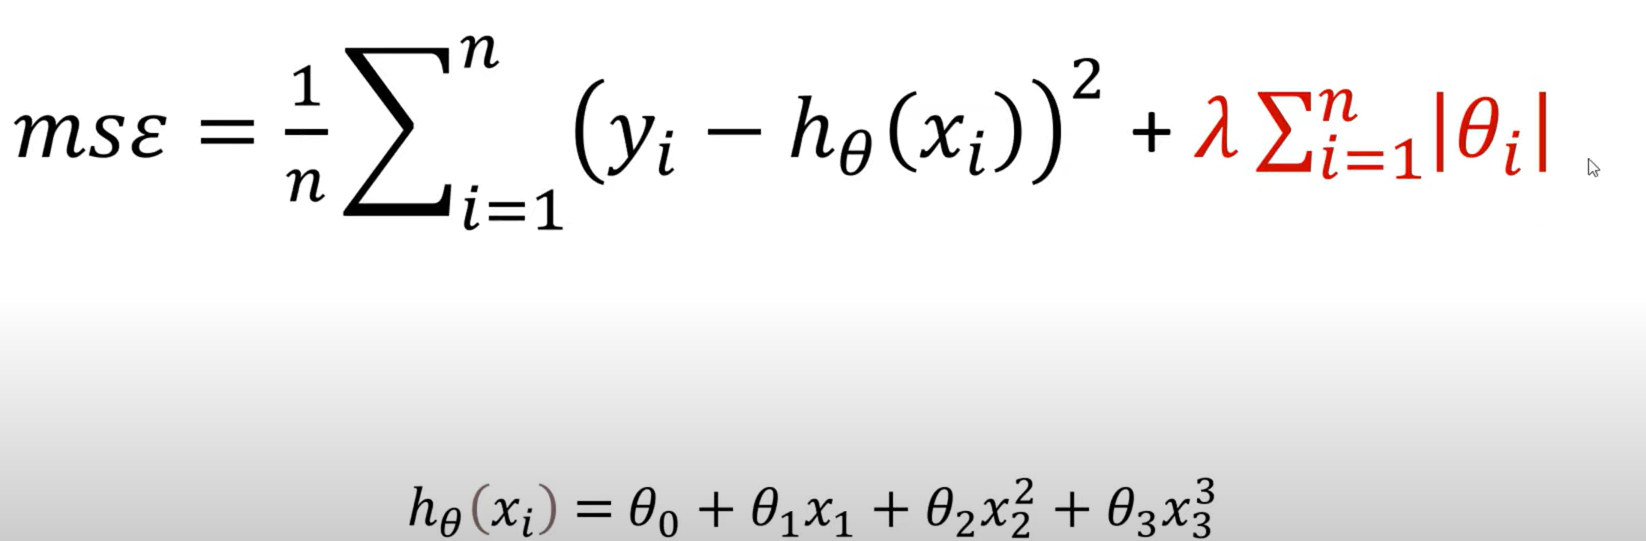
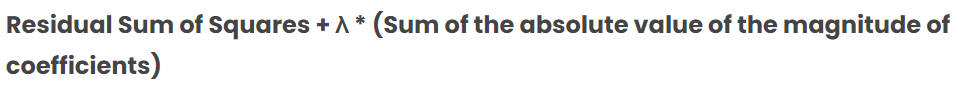

total lasso regression----https://sparkbyexamples.com/machine-learning/lasso-regression/

###### lasso regression python implementation


In [2]:
# https://youtu.be/OH4_Xsk8nfc?si=s9VkHeTN3y97aLW7
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv("auto-mpg.csv")
df.head()

mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

In [5]:
df.drop("car name",inplace=True,axis=1)
df.head()

mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin  
0       1  
1       1  
2       1  
3       1  
4       1

In [6]:
df.shape

(398, 8)

In [7]:
df.describe()

mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000      8.000000   
25%     17.500000    4.000000    104.250000  2223.750000     13.825000   
50%     23.000000    4.000000    148.500000  2803.500000     15.500000   
75%     29.000000    8.000000    262.000000  3608.000000     17.175000   
max     46.600000    8.000000    455.000000  5140.000000     24.800000   

       model year      origin  
count  398.000000  398.000000  
mean    76.010050    1.572864  
std      3.697627    0.802055  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [9]:
df.isnull().sum()


mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [14]:
df[df["horsepower"].str.isdigit()==False]

mpg  cylinders  displacement horsepower  weight  acceleration  \
32   25.0          4          98.0          ?    2046          19.0   
126  21.0          6         200.0          ?    2875          17.0   
330  40.9          4          85.0          ?    1835          17.3   
336  23.6          4         140.0          ?    2905          14.3   
354  34.5          4         100.0          ?    2320          15.8   
374  23.0          4         151.0          ?    3035          20.5   

     model year  origin  
32           71       1  
126          74       1  
330          80       2  
336          80       1  
354          81       2  
374          82       1

In [15]:
df["horsepower"]=df["horsepower"].replace("?",np.nan)
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [16]:
df["horsepower"]=df["horsepower"].fillna(df["horsepower"].median())
df.isna().sum()


mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [18]:
df.head(3)

mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   

   origin  
0       1  
1       1  
2       1

In [22]:
x=df.iloc[:,1:]
y=df[["mpg"]]
x

cylinders  displacement horsepower  weight  acceleration  model year  \
0            8         307.0        130    3504          12.0          70   
1            8         350.0        165    3693          11.5          70   
2            8         318.0        150    3436          11.0          70   
3            8         304.0        150    3433          12.0          70   
4            8         302.0        140    3449          10.5          70   
..         ...           ...        ...     ...           ...         ...   
393          4         140.0         86    2790          15.6          82   
394          4          97.0         52    2130          24.6          82   
395          4         135.0         84    2295          11.6          82   
396          4         120.0         79    2625          18.6          82   
397          4         119.0         82    2720          19.4          82   

     origin  
0         1  
1         1  
2         1  
3         1  
4         1  
..      ...  
393       1  
394       2  
395       1  
396       1  
397       1  

[398 rows x 7 columns]

In [23]:
y

mpg
0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
..    ...
393  27.0
394  44.0
395  32.0
396  28.0
397  31.0

[398 rows x 1 columns]

In [36]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
y_scaled=pd.DataFrame(scaler.fit_transform(y),columns=y.columns)
x_scaled

cylinders  displacement  horsepower    weight  acceleration  model year  \
0     1.498191      1.090604    0.673118  0.630870     -1.295498   -1.627426   
1     1.498191      1.503514    1.589958  0.854333     -1.477038   -1.627426   
2     1.498191      1.196232    1.197027  0.550470     -1.658577   -1.627426   
3     1.498191      1.061796    1.197027  0.546923     -1.295498   -1.627426   
4     1.498191      1.042591    0.935072  0.565841     -1.840117   -1.627426   
..         ...           ...         ...       ...           ...         ...   
393  -0.856321     -0.513026   -0.479482 -0.213324      0.011586    1.621983   
394  -0.856321     -0.925936   -1.370127 -0.993671      3.279296    1.621983   
395  -0.856321     -0.561039   -0.531873 -0.798585     -1.440730    1.621983   
396  -0.856321     -0.705077   -0.662850 -0.408411      1.100822    1.621983   
397  -0.856321     -0.714680   -0.584264 -0.296088      1.391285    1.621983   

       origin  
0   -0.715145  
1   -0.715145  
2   -0.715145  
3   -0.715145  
4   -0.715145  
..        ...  
393 -0.715145  
394  0.533222  
395 -0.715145  
396 -0.715145  
397 -0.715145  

[398 rows x 7 columns]

In [37]:
y_scaled

mpg
0   -0.706439
1   -1.090751
2   -0.706439
3   -0.962647
4   -0.834543
..        ...
393  0.446497
394  2.624265
395  1.087017
396  0.574601
397  0.958913

[398 rows x 1 columns]

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_scaled,test_size=0.30,random_state=1)
x_train

cylinders  displacement  horsepower    weight  acceleration  model year  \
350  -0.856321     -0.849116   -1.081977 -0.893172     -0.242570    1.351199   
59   -0.856321     -0.925936   -1.317736 -0.847061      2.879909   -1.085858   
120  -0.856321     -0.695475    0.201600 -0.121101     -0.024722   -0.815074   
12    1.498191      1.983643    1.197027  0.934732     -2.203196   -1.627426   
349  -0.856321     -0.983552   -0.951000 -1.165111      0.156817    1.351199   
..         ...           ...         ...       ...           ...         ...   
393  -0.856321     -0.513026   -0.479482 -0.213324      0.011586    1.621983   
255  -0.856321     -0.513026   -0.427091 -0.296088     -0.061030    0.538847   
72    1.498191      1.061796    1.197027  1.089620     -1.113959   -1.085858   
235  -0.856321     -0.925936   -0.767632 -0.834055      0.955591    0.268063   
37    0.320935      0.370411   -0.112746  0.375483     -0.024722   -1.356642   

       origin  
350 -0.715145  
59   0.533222  
120  0.533222  
12  -0.715145  
349  1.781589  
..        ...  
393 -0.715145  
255 -0.715145  
72  -0.715145  
235  1.781589  
37  -0.715145  

[278 rows x 7 columns]

In [39]:
x_test

cylinders  displacement  horsepower    weight  acceleration  model year  \
174   0.320935     -0.215346   -0.191332  0.016051     -0.387801   -0.273506   
359  -0.856321     -0.503423   -0.636655  0.306908      1.754364    1.351199   
250   1.498191      1.196232    0.935072  0.903991     -0.859804    0.538847   
274  -0.267693     -0.599449   -0.034159 -0.166030      0.120509    0.538847   
283   0.320935      0.370411   -0.374700  0.348290      0.955591    0.809631   
..         ...           ...         ...       ...           ...         ...   
382  -0.856321     -0.820308   -0.898609 -0.857702      0.483588    1.621983   
39    1.498191      1.983643    1.851913  1.765921     -1.477038   -1.356642   
171  -0.856321     -0.570641   -0.217527 -0.317370     -0.750880   -0.273506   
271  -0.856321     -0.359385    0.018232 -0.266530      0.410972    0.538847   
247  -0.856321     -1.041167   -0.898609 -1.064612      1.100822    0.538847   

       origin  
174 -0.715145  
359  0.533222  
250 -0.715145  
274  0.533222  
283 -0.715145  
..        ...  
382  1.781589  
39  -0.715145  
171  1.781589  
271 -0.715145  
247  1.781589  

[120 rows x 7 columns]

In [40]:
x_train.shape

(278, 7)

In [41]:
y_train.shape

(278, 1)

In [42]:
x_test.shape

(120, 7)

In [43]:
y_test.shape

(120, 1)

In [44]:
from sklearn.linear_model import LinearRegression, Lasso
lr=LinearRegression()
lr.fit(x_train,y_train)




LinearRegression()

In [45]:
l1=Lasso(alpha=0.1)
l1.fit(x_train,y_train)

Lasso(alpha=0.1)

In [55]:
y_lr_pred=pd.DataFrame(lr.predict(x_test),columns=y_test.columns)
y_lr_pred

mpg
0   -0.272752
1    0.370739
2   -0.436286
3    0.253484
4    0.105048
..        ...
115  1.415841
116 -1.667243
117  0.276105
118  0.301224
119  1.113667

[120 rows x 1 columns]

In [56]:
y_test

mpg
174 -0.706439
359  0.587411
250 -0.527093
274 -0.411800
283 -0.424610
..        ...
382  1.343225
39  -1.218855
171  0.062185
271 -0.040298
247  2.034986

[120 rows x 1 columns]

In [57]:
y_l1_pred=pd.DataFrame(l1.predict(x_test),columns=y_test.columns)
y_l1_pred

mpg
0   -0.092339
1    0.234410
2   -0.421086
3    0.282680
4    0.020198
..        ...
115  1.066543
116 -1.521566
117  0.168753
118  0.317422
119  0.878673

[120 rows x 1 columns]

In [58]:
x_scaled.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model year', 'origin'],
      dtype='object')

In [59]:
lr.coef_

array([[-0.08561437,  0.30441823, -0.09718466, -0.76286328,  0.02159128,
         0.37494081,  0.12302637]])

In [60]:
x_scaled.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model year', 'origin'],
      dtype='object')

In [61]:
l1.coef_

array([-0.        , -0.        , -0.01328   , -0.62052079,  0.        ,
        0.29198733,  0.02156765])

In [63]:
lr.score(x_train,y_train)

0.8081802739111359

In [65]:
lr.score(x_test,y_test)

0.8472274567567305

In [64]:
l1.score(x_train,y_train)

0.7853770917055521

In [66]:
l1.score(x_test,y_test)

0.8277658025171161

## another implementation of lasso

In [70]:
###  https://youtu.be/VqKq78PVO9g?si=wkpIr09MmkMtDGa7
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [72]:
df=pd.read_csv("Melbourne_housing_FULL.csv")
df.head()

Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/09/2016       2.5    3067.0  ...       1.0  1.0     126.0           NaN   
1  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
2  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
3  4/02/2016       2.5    3067.0  ...       2.0  1.0       0.0           NaN   
4  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   

   YearBuilt         CouncilArea Lattitude  Longtitude             Regionname  \
0        NaN  Yarra City Council  -37.8014    144.9958  Northern Metropolitan   
1        NaN  Yarra City Council  -37.7996    144.9984  Northern Metropolitan   
2     1900.0  Yarra City Council  -37.8079    144.9934  Northern Metropolitan   
3        NaN  Yarra City Council  -37.8114    145.0116  Northern Metropolitan   
4     1900.0  Yarra City Council  -37.8093    144.9944  Northern Metropolitan   

  Propertycount  
0        4019.0  
1        4019.0  
2        4019.0  
3        4019.0  
4        4019.0  

[5 rows x 21 columns]

In [73]:
df.describe()

Rooms         Price      Distance      Postcode      Bedroom2  \
count  34857.000000  2.724700e+04  34856.000000  34856.000000  26640.000000   
mean       3.031012  1.050173e+06     11.184929   3116.062859      3.084647   
std        0.969933  6.414671e+05      6.788892    109.023903      0.980690   
min        1.000000  8.500000e+04      0.000000   3000.000000      0.000000   
25%        2.000000  6.350000e+05      6.400000   3051.000000      2.000000   
50%        3.000000  8.700000e+05     10.300000   3103.000000      3.000000   
75%        4.000000  1.295000e+06     14.000000   3156.000000      4.000000   
max       16.000000  1.120000e+07     48.100000   3978.000000     30.000000   

           Bathroom           Car       Landsize  BuildingArea     YearBuilt  \
count  26631.000000  26129.000000   23047.000000   13742.00000  15551.000000   
mean       1.624798      1.728845     593.598993     160.25640   1965.289885   
std        0.724212      1.010771    3398.841946     401.26706     37.328178   
min        0.000000      0.000000       0.000000       0.00000   1196.000000   
25%        1.000000      1.000000     224.000000     102.00000   1940.000000   
50%        2.000000      2.000000     521.000000     136.00000   1970.000000   
75%        2.000000      2.000000     670.000000     188.00000   2000.000000   
max       12.000000     26.000000  433014.000000   44515.00000   2106.000000   

          Lattitude    Longtitude  Propertycount  
count  26881.000000  26881.000000   34854.000000  
mean     -37.810634    145.001851    7572.888306  
std        0.090279      0.120169    4428.090313  
min      -38.190430    144.423790      83.000000  
25%      -37.862950    144.933500    4385.000000  
50%      -37.807600    145.007800    6763.000000  
75%      -37.754100    145.071900   10412.000000  
max      -37.390200    145.526350   21650.000000

In [74]:
df.shape

(34857, 21)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [76]:
df.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [78]:
cols=["Suburb",	"Rooms"	,"Type",		"Method"	,"SellerG",	"Regionname","Propertycount","Distance","CouncilArea","Bedroom2",
    "Bathroom",	"Car",	"Landsize"	,"BuildingArea"	,"Price"]
df=df[cols]
df

Suburb  Rooms Type Method        SellerG             Regionname  \
0      Abbotsford      2    h     SS         Jellis  Northern Metropolitan   
1      Abbotsford      2    h      S         Biggin  Northern Metropolitan   
2      Abbotsford      2    h      S         Biggin  Northern Metropolitan   
3      Abbotsford      3    u     VB         Rounds  Northern Metropolitan   
4      Abbotsford      3    h     SP         Biggin  Northern Metropolitan   
...           ...    ...  ...    ...            ...                    ...   
34852  Yarraville      4    h     PI            Jas   Western Metropolitan   
34853  Yarraville      2    h     SP        Sweeney   Western Metropolitan   
34854  Yarraville      2    t      S            Jas   Western Metropolitan   
34855  Yarraville      3    h     SP  hockingstuart   Western Metropolitan   
34856  Yarraville      2    h     PI             RW   Western Metropolitan   

       Propertycount  Distance               CouncilArea  Bedroom2  Bathroom  \
0             4019.0       2.5        Yarra City Council       2.0       1.0   
1             4019.0       2.5        Yarra City Council       2.0       1.0   
2             4019.0       2.5        Yarra City Council       2.0       1.0   
3             4019.0       2.5        Yarra City Council       3.0       2.0   
4             4019.0       2.5        Yarra City Council       3.0       2.0   
...              ...       ...                       ...       ...       ...   
34852         6543.0       6.3  Maribyrnong City Council       4.0       1.0   
34853         6543.0       6.3  Maribyrnong City Council       2.0       2.0   
34854         6543.0       6.3  Maribyrnong City Council       2.0       1.0   
34855         6543.0       6.3  Maribyrnong City Council       NaN       NaN   
34856         6543.0       6.3  Maribyrnong City Council       2.0       1.0   

       Car  Landsize  BuildingArea      Price  
0      1.0     126.0           NaN        NaN  
1      1.0     202.0           NaN  1480000.0  
2      0.0     156.0          79.0  1035000.0  
3      1.0       0.0           NaN        NaN  
4      0.0     134.0         150.0  1465000.0  
...    ...       ...           ...        ...  
34852  3.0     593.0           NaN  1480000.0  
34853  1.0      98.0         104.0   888000.0  
34854  2.0     220.0         120.0   705000.0  
34855  NaN       NaN           NaN  1140000.0  
34856  0.0     250.0         103.0  1020000.0  

[34857 rows x 15 columns]

In [79]:
df.isnull().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        3
Distance             1
CouncilArea          3
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

In [81]:
df.nunique()

Suburb            351
Rooms              12
Type                3
Method              9
SellerG           388
Regionname          8
Propertycount     342
Distance          215
CouncilArea        33
Bedroom2           15
Bathroom           11
Car                15
Landsize         1684
BuildingArea      740
Price            2871
dtype: int64

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Rooms          34857 non-null  int64  
 2   Type           34857 non-null  object 
 3   Method         34857 non-null  object 
 4   SellerG        34857 non-null  object 
 5   Regionname     34854 non-null  object 
 6   Propertycount  34854 non-null  float64
 7   Distance       34856 non-null  float64
 8   CouncilArea    34854 non-null  object 
 9   Bedroom2       26640 non-null  float64
 10  Bathroom       26631 non-null  float64
 11  Car            26129 non-null  float64
 12  Landsize       23047 non-null  float64
 13  BuildingArea   13742 non-null  float64
 14  Price          27247 non-null  float64
dtypes: float64(8), int64(1), object(6)
memory usage: 4.0+ MB


In [83]:
cols_to_fill_zero=["Propertycount",	"Distance",		"Bedroom2",	"Bathroom",	"Car"]
df[cols_to_fill_zero]=df[cols_to_fill_zero].fillna(0)
df.isnull().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        0
Distance             0
CouncilArea          3
Bedroom2             0
Bathroom             0
Car                  0
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

In [84]:
df["Landsize"]=df["Landsize"].fillna(df["Landsize"].mean())
df["BuildingArea"]=df["BuildingArea"].fillna(df["BuildingArea"].mean())
df.isnull().sum()
                         

Suburb              0
Rooms               0
Type                0
Method              0
SellerG             0
Regionname          3
Propertycount       0
Distance            0
CouncilArea         3
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
Price            7610
dtype: int64

In [85]:
df.dropna(inplace=True)
df.isnull().sum()

Suburb           0
Rooms            0
Type             0
Method           0
SellerG          0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
Price            0
dtype: int64

In [86]:
df.shape

(27244, 15)

In [87]:
df=pd.get_dummies(df,drop_first=True)
df.head()

Rooms  Propertycount  Distance  Bedroom2  Bathroom  Car  Landsize  \
1      2         4019.0       2.5       2.0       1.0  1.0     202.0   
2      2         4019.0       2.5       2.0       1.0  0.0     156.0   
4      3         4019.0       2.5       3.0       2.0  0.0     134.0   
5      3         4019.0       2.5       3.0       2.0  1.0      94.0   
6      4         4019.0       2.5       3.0       1.0  2.0     120.0   

   BuildingArea      Price  Suburb_Aberfeldie  ...  \
1      160.2564  1480000.0              False  ...   
2       79.0000  1035000.0              False  ...   
4      150.0000  1465000.0              False  ...   
5      160.2564   850000.0              False  ...   
6      142.0000  1600000.0              False  ...   

   CouncilArea_Moorabool Shire Council  CouncilArea_Moreland City Council  \
1                                False                              False   
2                                False                              False   
4                                False                              False   
5                                False                              False   
6                                False                              False   

   CouncilArea_Nillumbik Shire Council  CouncilArea_Port Phillip City Council  \
1                                False                                  False   
2                                False                                  False   
4                                False                                  False   
5                                False                                  False   
6                                False                                  False   

   CouncilArea_Stonnington City Council  CouncilArea_Whitehorse City Council  \
1                                 False                                False   
2                                 False                                False   
4                                 False                                False   
5                                 False                                False   
6                                 False                                False   

   CouncilArea_Whittlesea City Council  CouncilArea_Wyndham City Council  \
1                                False                             False   
2                                False                             False   
4                                False                             False   
5                                False                             False   
6                                False                             False   

   CouncilArea_Yarra City Council  CouncilArea_Yarra Ranges Shire Council  
1                            True                                   False  
2                            True                                   False  
4                            True                                   False  
5                            True                                   False  
6                            True                                   False  

[5 rows x 745 columns]

In [88]:
x=df.drop("Price",axis=1)
y=df["Price"]
x

Rooms  Propertycount  Distance  Bedroom2  Bathroom  Car    Landsize  \
1          2         4019.0       2.5       2.0       1.0  1.0  202.000000   
2          2         4019.0       2.5       2.0       1.0  0.0  156.000000   
4          3         4019.0       2.5       3.0       2.0  0.0  134.000000   
5          3         4019.0       2.5       3.0       2.0  1.0   94.000000   
6          4         4019.0       2.5       3.0       1.0  2.0  120.000000   
...      ...            ...       ...       ...       ...  ...         ...   
34852      4         6543.0       6.3       4.0       1.0  3.0  593.000000   
34853      2         6543.0       6.3       2.0       2.0  1.0   98.000000   
34854      2         6543.0       6.3       2.0       1.0  2.0  220.000000   
34855      3         6543.0       6.3       0.0       0.0  0.0  593.598993   
34856      2         6543.0       6.3       2.0       1.0  0.0  250.000000   

       BuildingArea  Suburb_Aberfeldie  Suburb_Airport West  ...  \
1          160.2564              False                False  ...   
2           79.0000              False                False  ...   
4          150.0000              False                False  ...   
5          160.2564              False                False  ...   
6          142.0000              False                False  ...   
...             ...                ...                  ...  ...   
34852      160.2564              False                False  ...   
34853      104.0000              False                False  ...   
34854      120.0000              False                False  ...   
34855      160.2564              False                False  ...   
34856      103.0000              False                False  ...   

       CouncilArea_Moorabool Shire Council  CouncilArea_Moreland City Council  \
1                                    False                              False   
2                                    False                              False   
4                                    False                              False   
5                                    False                              False   
6                                    False                              False   
...                                    ...                                ...   
34852                                False                              False   
34853                                False                              False   
34854                                False                              False   
34855                                False                              False   
34856                                False                              False   

       CouncilArea_Nillumbik Shire Council  \
1                                    False   
2                                    False   
4                                    False   
5                                    False   
6                                    False   
...                                    ...   
34852                                False   
34853                                False   
34854                                False   
34855                                False   
34856                                False   

       CouncilArea_Port Phillip City Council  \
1                                      False   
2                                      False   
4                                      False   
5                                      False   
6                                      False   
...                                      ...   
34852                                  False   
34853                                  False   
34854                                  False   
34855                                  False   
34856                                  False   

       CouncilArea_Stonnington City Council  \
1                                     False   
2                                     False   
4        

In [89]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)
x_train

Rooms  Propertycount  Distance  Bedroom2  Bathroom  Car    Landsize  \
12799      2         3593.0       4.4       2.0       1.0  1.0    0.000000   
477        3         4836.0       6.3       0.0       0.0  0.0  593.598993   
29182      3        16166.0      14.7       3.0       2.0  2.0  580.000000   
21339      3         8801.0       8.4       3.0       1.0  2.0  593.598993   
22275      3        11918.0       5.2       3.0       1.0  2.0  212.000000   
...      ...            ...       ...       ...       ...  ...         ...   
24177      4         2894.0      10.2       4.0       1.0  0.0  828.000000   
15171      1         4442.0      10.1       1.0       1.0  1.0    0.000000   
8585       3        21650.0      11.2       3.0       1.0  1.0  563.000000   
3351       3        11204.0       7.8       3.0       1.0  1.0  404.000000   
30337      2         9264.0       7.5       0.0       0.0  0.0  593.598993   

       BuildingArea  Suburb_Aberfeldie  Suburb_Airport West  ...  \
12799       62.0000              False                False  ...   
477        160.2564              False                False  ...   
29182      160.2564              False                False  ...   
21339      160.2564              False                False  ...   
22275      160.2564              False                False  ...   
...             ...                ...                  ...  ...   
24177      160.2564              False                False  ...   
15171      160.2564              False                False  ...   
8585       118.0000              False                False  ...   
3351       160.2564              False                False  ...   
30337      160.2564              False                False  ...   

       CouncilArea_Moorabool Shire Council  CouncilArea_Moreland City Council  \
12799                                False                              False   
477                                  False                              False   
29182                                False                              False   
21339                                False                              False   
22275                                False                               True   
...                                    ...                                ...   
24177                                False                              False   
15171                                False                              False   
8585                                 False                              False   
3351                                 False                              False   
30337                                False                              False   

       CouncilArea_Nillumbik Shire Council  \
12799                                False   
477                                  False   
29182                                False   
21339                                False   
22275                                False   
...                                    ...   
24177                                False   
15171                                False   
8585                                 False   
3351                                 False   
30337                                False   

       CouncilArea_Port Phillip City Council  \
12799                                  False   
477                                    False   
29182                                  False   
21339                                  False   
22275                                  False   
...                                      ...   
24177                                  False   
15171                                  False   
8585                                   False   
3351                                   False   
30337                                  False   

       CouncilArea_Stonnington City Council  \
12799                                 False   
477                                    True   
29182    

In [90]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [91]:
y_pred=lr.predict(x_test)
y_pred

array([1672988.74422554, 1086049.72133919,  852828.79000717, ...,
        891754.56465617,  783898.88694769, 1170611.74699149])

In [92]:
lr.score(x_train,y_train)

0.6827792395792723

In [93]:
lr.score(x_test,y_test)

0.13853683161585995

In [94]:
x_train.columns

Index(['Rooms', 'Propertycount', 'Distance', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'Suburb_Aberfeldie', 'Suburb_Airport West',
       ...
       'CouncilArea_Moorabool Shire Council',
       'CouncilArea_Moreland City Council',
       'CouncilArea_Nillumbik Shire Council',
       'CouncilArea_Port Phillip City Council',
       'CouncilArea_Stonnington City Council',
       'CouncilArea_Whitehorse City Council',
       'CouncilArea_Whittlesea City Council',
       'CouncilArea_Wyndham City Council', 'CouncilArea_Yarra City Council',
       'CouncilArea_Yarra Ranges Shire Council'],
      dtype='object', length=744)

In [95]:
lr.coef_

array([ 2.64001655e+05,  4.92118905e+00, -4.64732744e+04, -8.22349031e+04,
        1.17151153e+05,  4.29703140e+04,  2.35173742e+00,  4.70024530e+02,
        2.61342069e+05, -4.61008827e+04, -1.32312259e+05,  2.15453995e+05,
        1.20133839e+05,  2.72683980e+05,  1.74702166e+05, -8.00201053e+04,
       -1.50967673e+05, -4.94461444e+04,  1.17711126e+05, -1.28880253e+05,
       -3.49349656e+04, -8.54261329e+03,  6.19157896e+04, -2.57258028e+05,
       -1.10868116e+05, -2.42391674e+05,  1.79856957e+05, -1.22395100e+05,
        2.04625284e+05,  3.78258911e+04,  1.46681364e+05,  2.32198630e+03,
        7.35395732e+04, -5.29198411e+04,  1.90482393e+05, -3.20451670e+05,
        7.49515014e+04, -2.83019804e+04,  2.69103300e+04,  2.78824270e+05,
        1.51386730e+05, -1.06324212e+05, -8.45087700e+04,  2.96568248e+05,
        1.50644588e+05,  1.08499080e-07,  1.75999576e+05, -1.20057166e+05,
       -9.64544651e+03,  3.68377378e+05, -1.35478625e+05, -6.38092126e+04,
        3.53493139e+04,  

In [96]:
lr.coef_.shape

(744,)

In [97]:
from sklearn.linear_model import Lasso
l1=Lasso(alpha=50,max_iter=100,tol=0.1)
l1.fit(x_train,y_train)

C:\Users\shema\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.327e+15, tolerance: 7.963e+14
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=50, max_iter=100, tol=0.1)

In [100]:
l1.coef_

array([ 2.70967779e+05,  4.63745956e+00, -3.03357705e+04, -8.48946624e+04,
        1.23220366e+05,  4.17503159e+04,  2.56283488e+00,  8.65129010e+01,
        2.19220733e+05, -1.20065548e+05, -0.00000000e+00,  3.24095470e+05,
        1.55485391e+05,  2.97071682e+05,  1.38140476e+05, -9.41251645e+04,
       -1.30121499e+05, -0.00000000e+00,  1.51646664e+05, -9.60503347e+04,
       -1.74328672e+04, -0.00000000e+00,  2.29652095e+04, -1.42906742e+05,
       -0.00000000e+00, -2.72295256e+05,  0.00000000e+00, -3.51581901e+04,
        2.31085764e+05,  6.08260117e+04,  3.20753304e+04, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  1.90154504e+05, -1.90416055e+05,
        3.35876186e+04, -8.78863211e+04,  5.12664874e+04,  2.57628933e+05,
        1.86342954e+05, -5.53309467e+03, -0.00000000e+00,  6.29880653e+04,
        1.70718008e+04,  0.00000000e+00,  2.46076632e+05, -1.20882624e+05,
       -0.00000000e+00,  4.88763467e+05, -0.00000000e+00,  1.27428350e+04,
        0.00000000e+00,  

In [101]:
x.columns

Index(['Rooms', 'Propertycount', 'Distance', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'Suburb_Aberfeldie', 'Suburb_Airport West',
       ...
       'CouncilArea_Moorabool Shire Council',
       'CouncilArea_Moreland City Council',
       'CouncilArea_Nillumbik Shire Council',
       'CouncilArea_Port Phillip City Council',
       'CouncilArea_Stonnington City Council',
       'CouncilArea_Whitehorse City Council',
       'CouncilArea_Whittlesea City Council',
       'CouncilArea_Wyndham City Council', 'CouncilArea_Yarra City Council',
       'CouncilArea_Yarra Ranges Shire Council'],
      dtype='object', length=744)

In [98]:
l1.score(x_train,y_train)

0.6766985624766824

In [99]:
l1.score(x_test,y_test)

0.6636111369404488

## Elastic net regression

    -Elastic net linear regression uses the penalties from both the lasso and ridge techniques to regularize regression models.
    - The technique combines both the lasso and ridge regression methods by learning from their shortcomings to improve the regularization of statistical models.
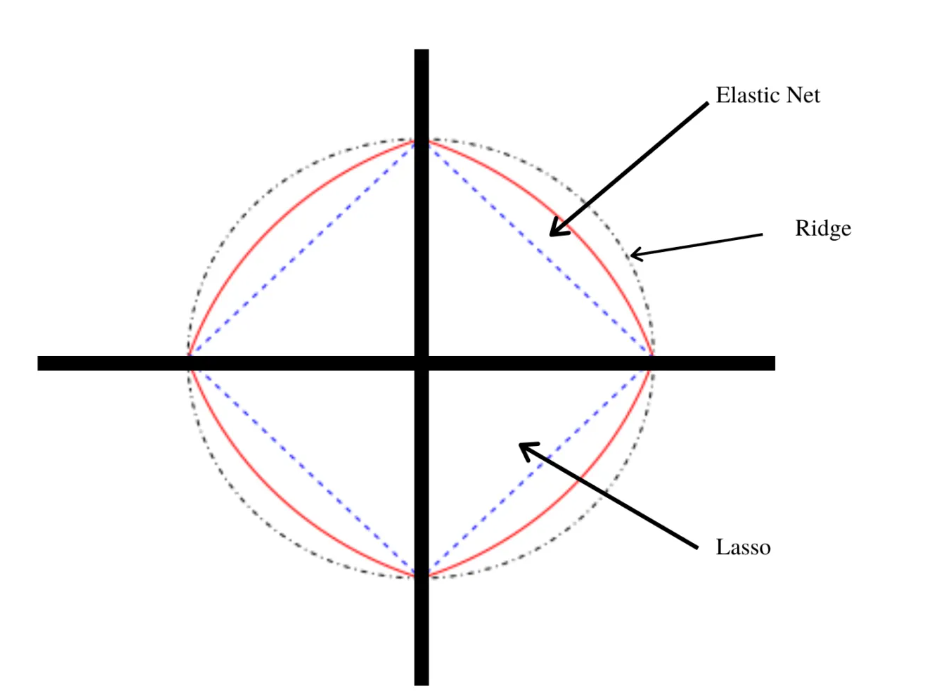
    
    -The elastic net method performs variable selection and regularization simultaneously.
    -The elastic net technique is most appropriate where the dimensional data is greater than the number of samples used.
    -Groupings and variables selection are the key roles of the elastic net technique.
    -In the procedure for finding the elastic net method’s estimator, two stages involve both the lasso and regression techniques. It first finds the ridge regression coefficients and then conducts the second step by using a lasso sort of shrinkage of the coefficients.
https://youtu.be/lOnxA6JgNmc?si=0YER3nlPfQEreQL4

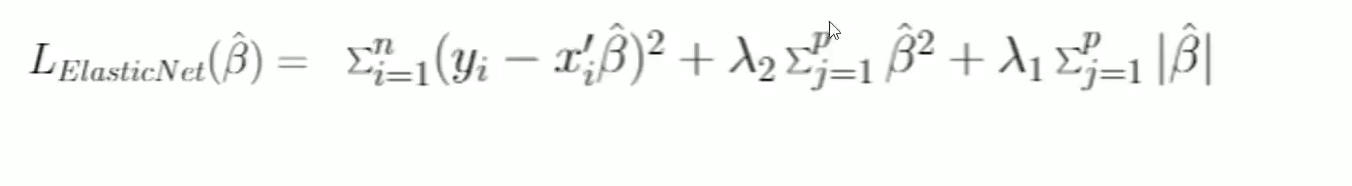

https://youtu.be/JZNsUWWjxmE?si=oud3Bn2Kp78qsCoG

elastic-net implementation--

https://analyticsindiamag.com/hands-on-tutorial-on-elasticnet-regression/

https://youtu.be/AeEj3QRQgN8?si=ky7TucQnZeSNPl2F

https://youtu.be/xxgOkAt8nMU?si=zsA6Ilj6wUYSilmz

https://youtu.be/L69WTMkxv-E?si=Dmlz1gnmUEwD_7q1

https://python.plainenglish.io/ridge-lasso-elasticnet-regressions-from-scratch-32bf9f1a03be

The Elastic Net regularization is a combination of L1 (Lasso) and L2 (Ridge) regularization techniques. It is commonly used in machine learning algorithms like logistic regression, linear regression, and support vector machines (SVMs) to prevent overfitting and improve model performance.

Here's an implementation of Elastic Net regularization using Python's Scikit-Learn library:

```python
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Load the Boston Housing dataset
boston = load_boston()
X = boston.data
y = boston.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features to have zero mean and unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an ElasticNet object with alpha=0.5 (combination of L1 and L2 regularization) and l1_ratio=0.5 (balance between L1 and L2)
model = ElasticNet(alpha=0.5, l1_ratio=0.5)

# Fit the model on the training data and predict on the test data
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate the R2 score to evaluate the model's performance on the test set
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)  # Output: R2 Score: 0.9497476348863735
``` 
In this example, we first load the Boston Housing dataset using Scikit-Learn's `load_boston()` function. We then split the data into training and testing sets using `train_test_split()`. Next, we standardize the features using `StandardScaler()`. We create an `ElasticNet` object with `alpha=0.5` and `l1_ratio=0.5`, which is then fit on the training data using `fit()`. Finally, we predict on the test set using `predict()` and calculate the R2 score using `r2_score()`. The output shows that our Elastic Net model has achieved a high R2 score of 0.9497476348863735 on the test set.

In [6]:
## https://youtu.be/AeEj3QRQgN8?si=ky7TucQnZeSNPl2F
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,ElasticNet
from sklearn.metrics import mean_squared_error


In [9]:
df=pd.read_csv("Affairs.csv")
df

Unnamed: 0  affairs  gender   age  yearsmarried children  religiousness  \
0             4        0    male  37.0         10.00       no              3   
1             5        0  female  27.0          4.00       no              4   
2            11        0  female  32.0         15.00      yes              1   
3            16        0    male  57.0         15.00      yes              5   
4            23        0    male  22.0          0.75       no              2   
..          ...      ...     ...   ...           ...      ...            ...   
596        1938        1    male  22.0          1.50      yes              1   
597        1941        7  female  32.0         10.00      yes              2   
598        1954        2    male  32.0         10.00      yes              2   
599        1959        2    male  22.0          7.00      yes              3   
600        9010        1  female  32.0         15.00      yes              3   

     education  occupation  rating  
0           18           7       4  
1           14           6       4  
2           12           1       4  
3           18           6       5  
4           17           6       3  
..         ...         ...     ...  
596         12           2       5  
597         18           5       4  
598         17           6       5  
599         18           6       2  
600         14           1       5  

[601 rows x 10 columns]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     601 non-null    int64  
 1   affairs        601 non-null    int64  
 2   gender         601 non-null    object 
 3   age            601 non-null    float64
 4   yearsmarried   601 non-null    float64
 5   children       601 non-null    object 
 6   religiousness  601 non-null    int64  
 7   education      601 non-null    int64  
 8   occupation     601 non-null    int64  
 9   rating         601 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 47.1+ KB


In [11]:
df=df.iloc[:,1:]
df

affairs  gender   age  yearsmarried children  religiousness  education  \
0          0    male  37.0         10.00       no              3         18   
1          0  female  27.0          4.00       no              4         14   
2          0  female  32.0         15.00      yes              1         12   
3          0    male  57.0         15.00      yes              5         18   
4          0    male  22.0          0.75       no              2         17   
..       ...     ...   ...           ...      ...            ...        ...   
596        1    male  22.0          1.50      yes              1         12   
597        7  female  32.0         10.00      yes              2         18   
598        2    male  32.0         10.00      yes              2         17   
599        2    male  22.0          7.00      yes              3         18   
600        1  female  32.0         15.00      yes              3         14   

     occupation  rating  
0             7       4  
1             6       4  
2             1       4  
3             6       5  
4             6       3  
..          ...     ...  
596           2       5  
597           5       4  
598           6       5  
599           6       2  
600           1       5  

[601 rows x 9 columns]

##### logistic regression

(https://sparkbyexamples.com/machine-learning/logistic-regression-explained-with-examples/)

https://youtu.be/yIYKR4sgzI8?si=7Mz7Oiv6LFS6s6OR

https://youtu.be/XnOAdxOWXWg?si=asFsrgnXp4N1rk0V

https://youtu.be/VCJdg7YBbAQ?si=-De_WYg6OgeOiXRx

https://www.javatpoint.com/logistic-regression-in-machine-learning

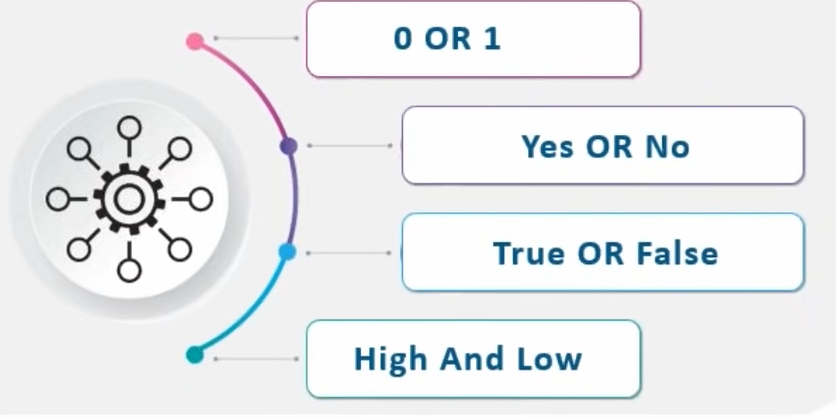

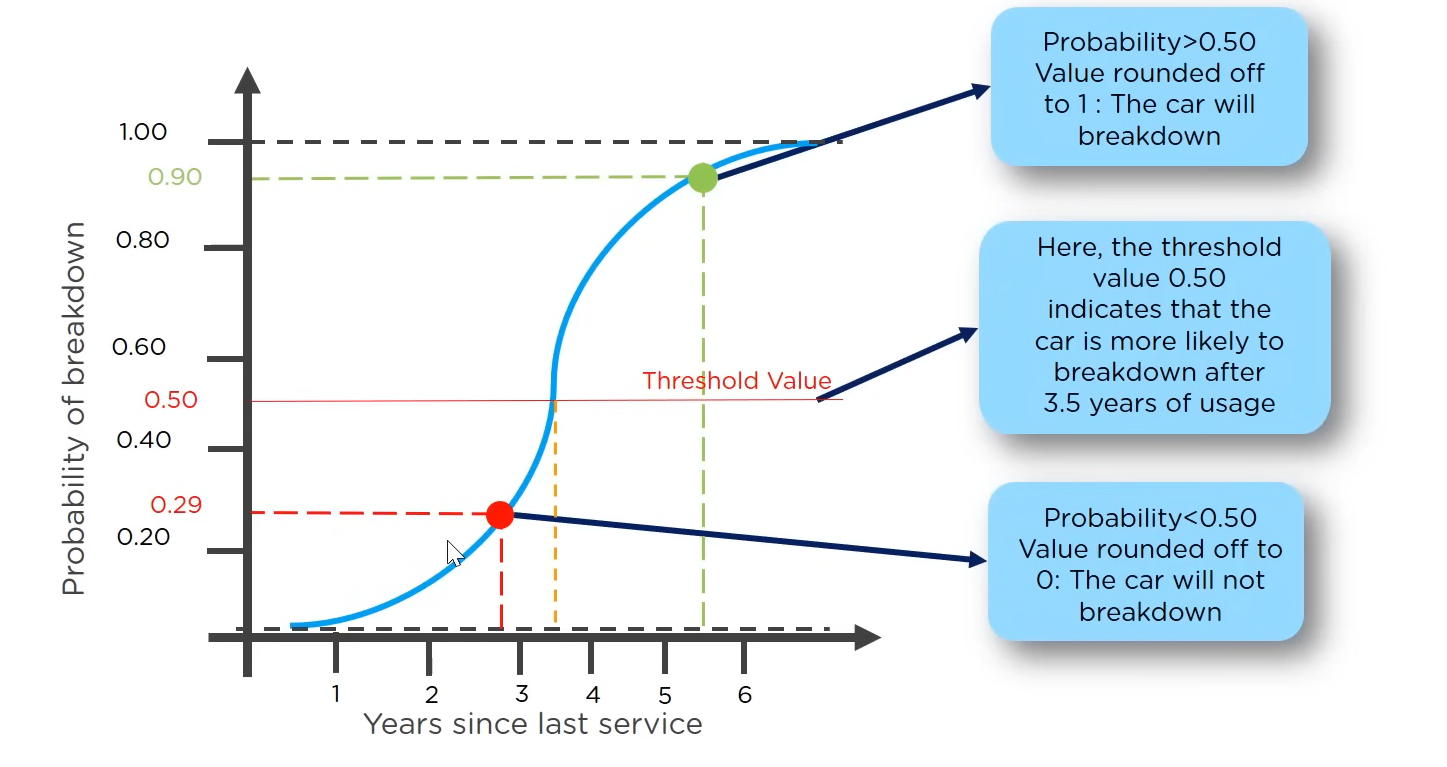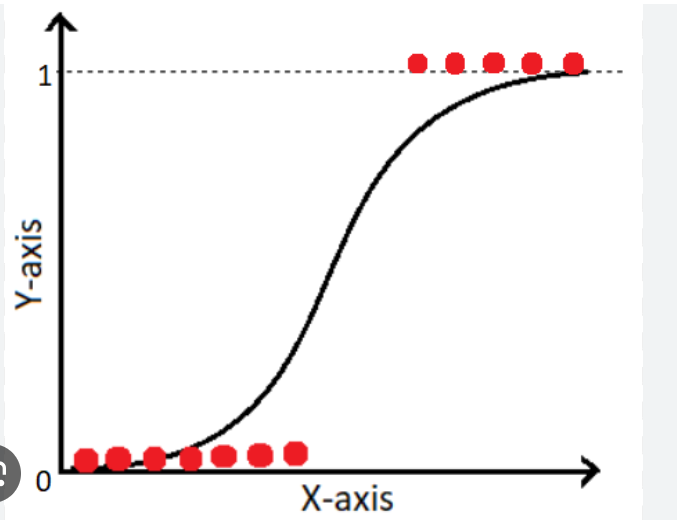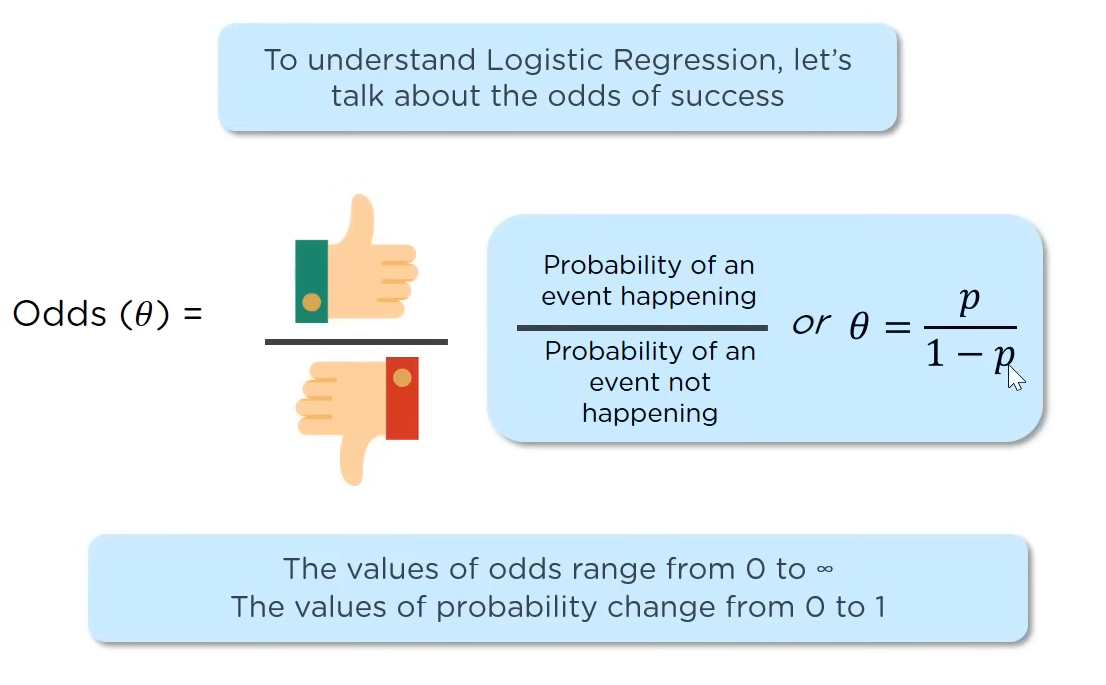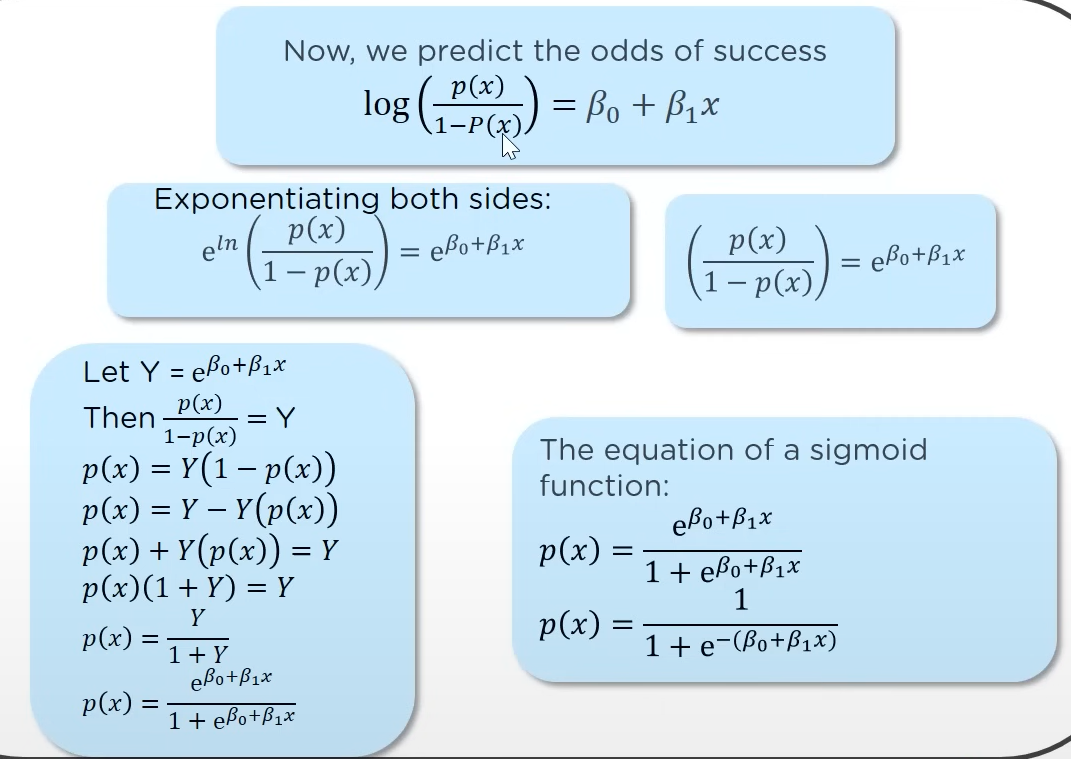
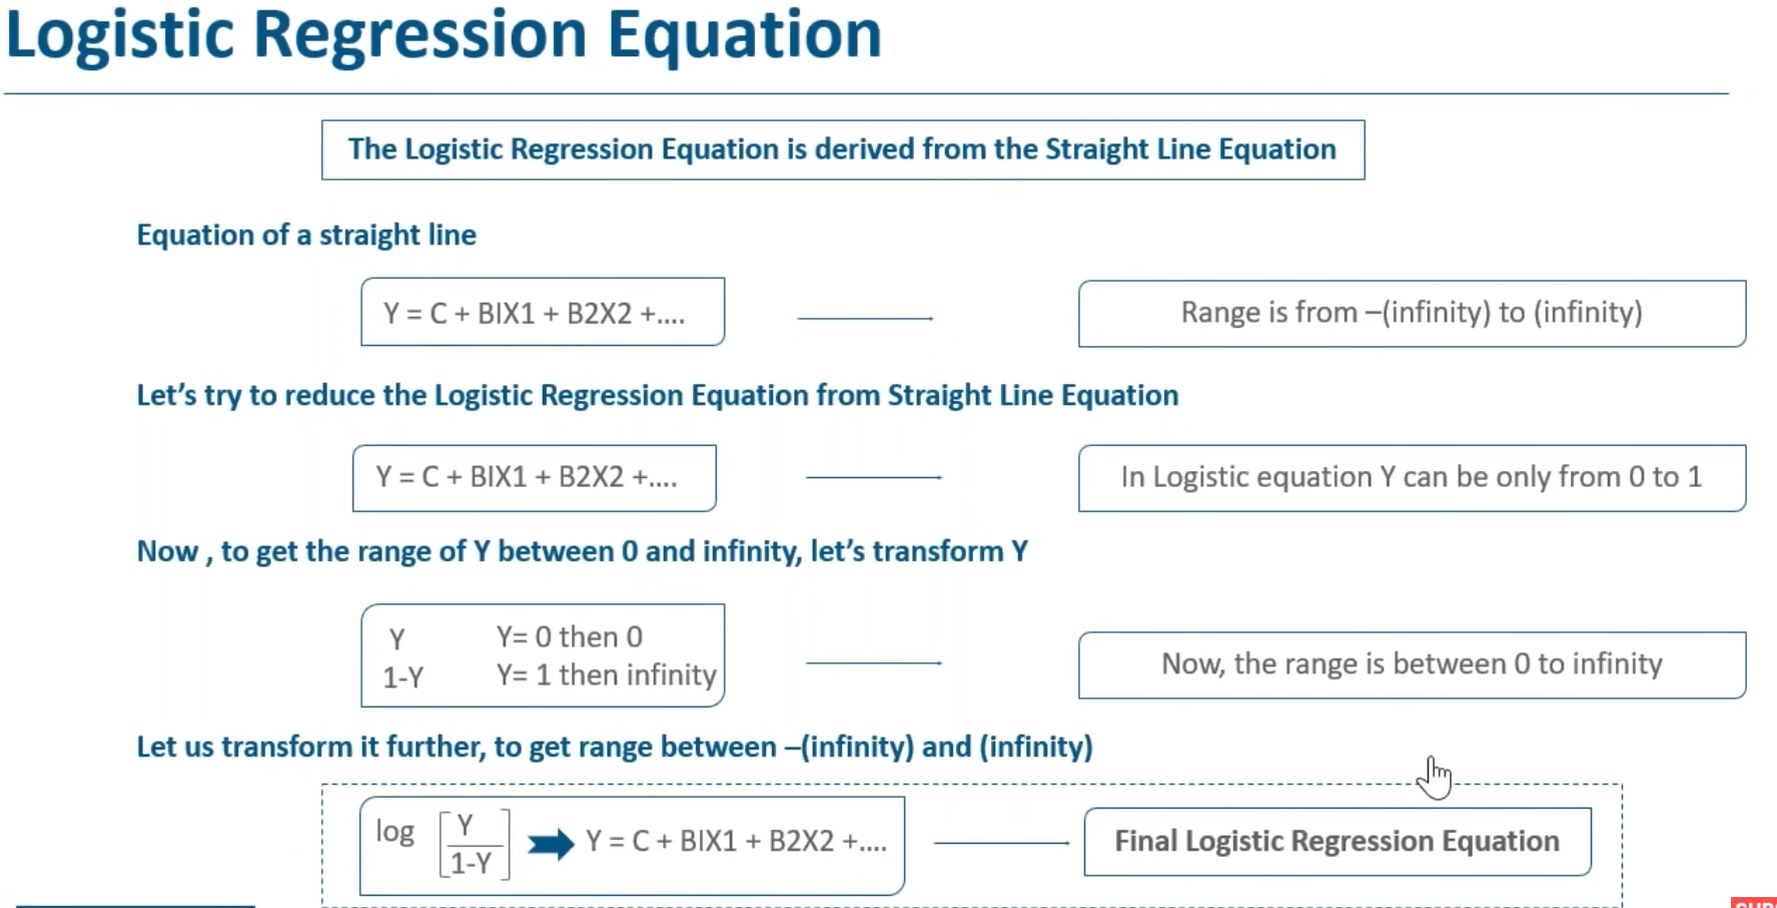
    
    -often used for classification and predictive analytics. 
    
    -Logistic regression estimates the probability of an event occurring, 
    
    -such as voted or didn’t vote, based on a given dataset of independent variables. 
    
    -Since the outcome is a probability, the dependent variable is bounded between 0 and 1.
    
    -in linear regression, it seeks to plot a line of best fit through a set of data points, which is typically calculated using the least squares method and R^2 is calculated to find the models accuracy.
    
    -whereas, in logistic regression it finds the best fit curve using the maximum likelihood method and R^2 is not used here
    
Types of logistic regression---https://www.ibm.com/topics/logistic-regression

Linear regression vs logistic regression---https://www.ibm.com/topics/logistic-regression
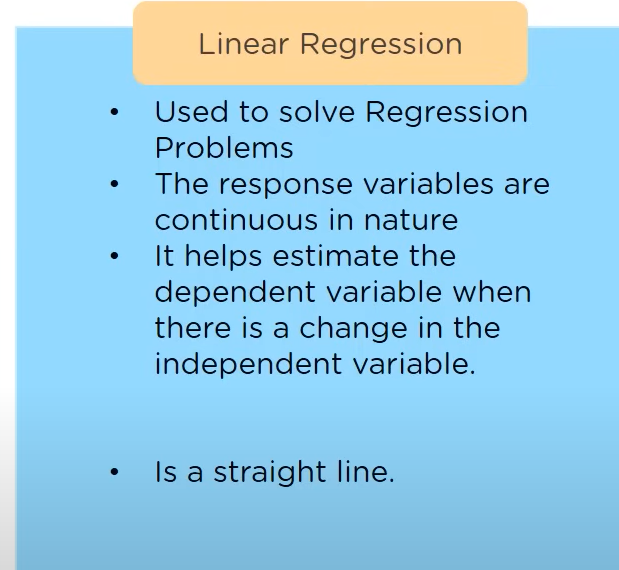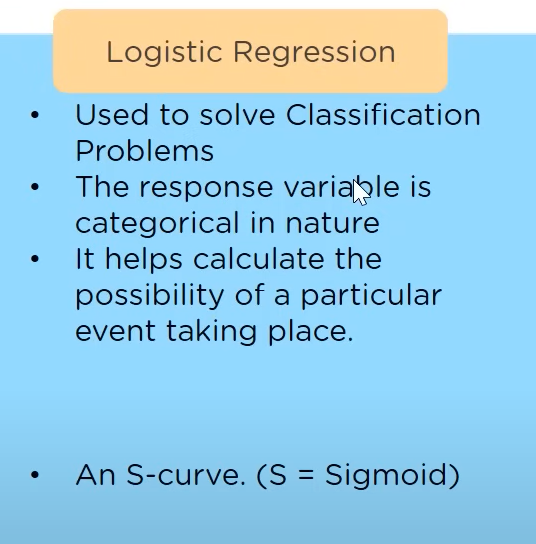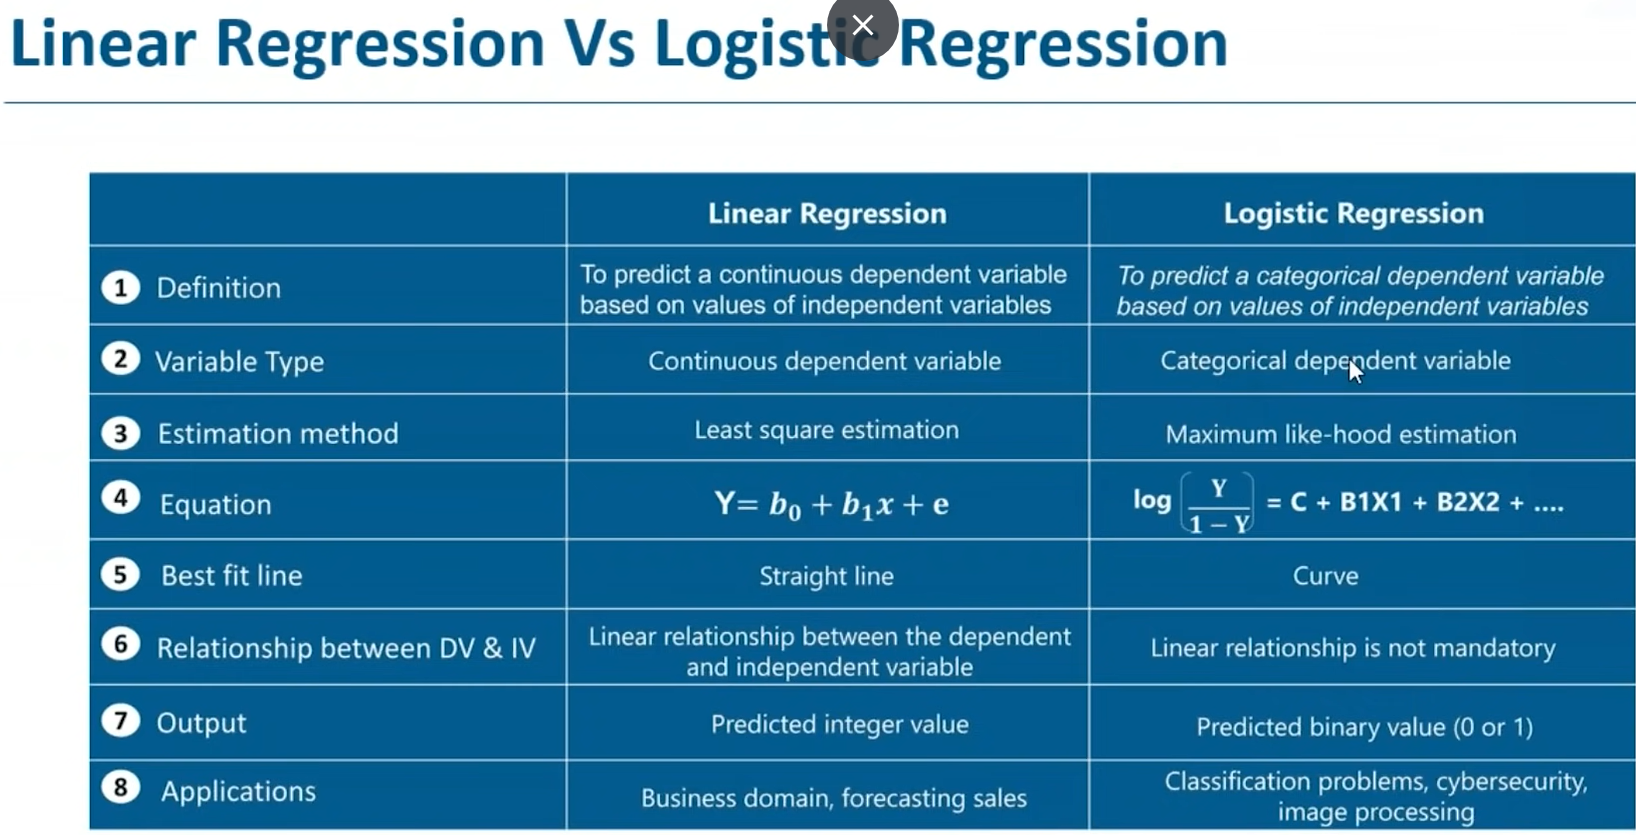
Why logistic regression and why it is called regression instead of classification?
    
    -It is used for classification algorithms its name is logistic regression. it's referred to as regression because it takes the output of the linear regression function as input and uses a sigmoid function to estimate the probability for the given class.
    
https://youtu.be/OCwZyYH14uw?si=fE-5LgWJH3nVo8Ld

Use cases of logistic regression----https://www.ibm.com/topics/logistic-regression


LOGISTIC REGRESSION IMPLEMENTATION-----------

What is ridge lasso and elastic net regression?
    
    Ridge Regression, which penalizes sum of squared coefficients (L2 penalty). 
    Lasso Regression, which penalizes the sum of absolute values of the coefficients (L1 penalty). 
    Elastic Net, a convex combination of Ridge and Lasso.
Ridge, LASSO, and ElasticNet Regression
    https://towardsdatascience.com/ridge-lasso-and-elasticnet-regression-b1f9c00ea3a3
    